In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
full_data = [train , test]

test_passIds = test[['Id']]

print(f'Train shape: {train.shape}')
print(f'Train shape: {test.shape}')

Train shape: (1460, 81)
Train shape: (1459, 80)


In [4]:
train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [8]:
train.describe(include=['O']).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

# Feature Exploration, Enginnering, Cleaning and Visulizations

In [9]:
def explore_col (df, col):
    print(f'Value Counts')
    print(df[col].value_counts(dropna = False))
    print('----------------------------')
    print(f'Total NaN')
    print(df[col].isna().sum())
    print('\n***************************\n')
    
def Corr_Plot(df, col):
    mean_price = df[[col, 'SalePrice']].groupby([col], as_index=False).mean().sort_values('SalePrice')
    
    sns.barplot(x=col, y='SalePrice', data=mean_price)

    plt.show()
    
# def Encoder(df, col):
#     mean_price2 = df[[col, 'SalePrice']].groupby([col], as_index=False).mean().sort_values('SalePrice').reset_index(drop=True)
#     for i in range(len(mean_price2)):
#         df[col] = df[col].replace(mean_price2[col][i] , i)

def Encoder(train, col):
    mean_price = train[[col, 'SalePrice']].groupby([col], as_index=False).mean().sort_values('SalePrice').reset_index(drop=True)
    mean_price_dict = dict(zip(mean_price[col].values, range(len(mean_price[col]))))

    train[col] = (train[col].map(mean_price_dict)).astype(float)
    test[col] = (test[col].map(mean_price_dict)).astype(float)
        
def fillna(df, col, fill_value='knn', n=5):
    if fill_value == 'knn':
        imputer = KNNImputer(n_neighbors=n)
        df[[col]] = imputer.fit_transform(df[[col]])
    elif fill_value == "mode":
        df[col] = df[col].fillna(df[col].mode()[0])
    elif fill_value == 'median':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(fill_value)


def get_nan_cols (df, threshold = 0.75):
    global nan_cols
    nan_cols = df.isna().sum()[(df.isna().sum() / df.shape[0]) > threshold].index
    
    return list(nan_cols)

def get_one_value_cols (df, threshold = 0.75):
    global one_value_cols
    one_value_cols = []
    
    for col in df.columns:
        if (df[col].value_counts().values[0] / df.shape[0]) > threshold:
            one_value_cols.append(col)
    
    return one_value_cols
    
def drop_cols (df, cols):
    df.drop(cols, axis=1 , inplace = True)

In [10]:
nan_cols = get_nan_cols(train)
one_value_cols = get_one_value_cols(train , 0.98)

for dataset in full_data:
    dataset.drop(nan_cols + one_value_cols, axis=1, inplace = True)

In [11]:
print(f'New train shape : {train.shape}')
print(f'New train shape : {test.shape}')

New train shape : (1460, 70)
New train shape : (1459, 69)


In [12]:
print(f'Dropped {len(nan_cols)} nan_cols : {nan_cols}')
print(f'Dropped {len(one_value_cols)} one_value_cols : {one_value_cols}')

Dropped 4 nan_cols : ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Dropped 7 one_value_cols : ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'LowQualFinSF', '3SsnPorch', 'PoolArea']


## 1.MSSubClass

There is no NaN values at train and test. Dtypes categorical int now. It means Building class

In [13]:
for dataset in full_data:
    explore_col(dataset, 'MSSubClass')

Value Counts
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
75       7
180      7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64
----------------------------
Total NaN
0

***************************



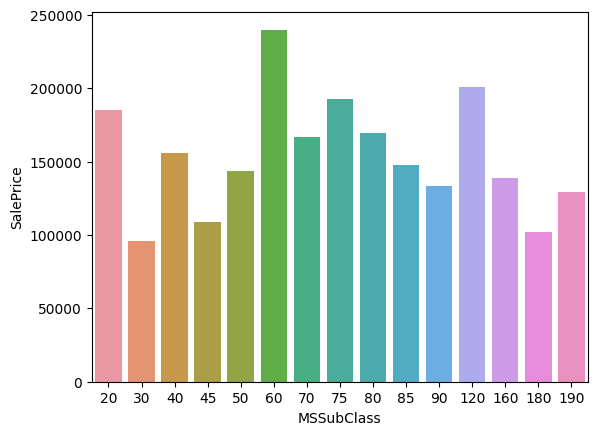

In [14]:
Corr_Plot(train, 'MSSubClass')

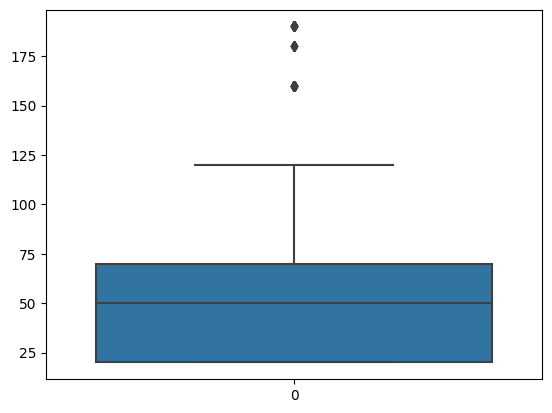

In [15]:
sns.boxplot(train['MSSubClass']);

## 2.MSZoning

There is no NaN values in train but 4 nan in test. Dtypes categorical object for now. It means general zoning classification. 

In [16]:
for dataset in full_data:
    explore_col(dataset, 'MSZoning')

Value Counts
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64
----------------------------
Total NaN
4

***************************



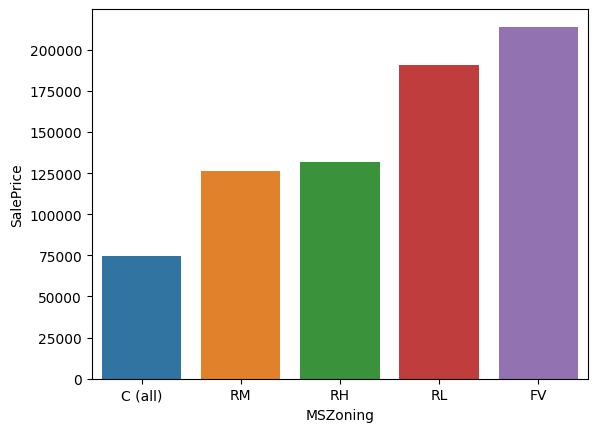

In [17]:
Corr_Plot(train, 'MSZoning')

In [18]:
Encoder(train, 'MSZoning')

In [19]:
fillna(test, "MSZoning")

## 3.LotFrontage

Around 250 nans at train and test dateset. Dtype already float. It means Linear feet of street connected to property

In [20]:
for dataset in full_data:   
    explore_col(dataset, 'LotFrontage')

Value Counts
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64
----------------------------
Total NaN
259

***************************

Value Counts
NaN      227
60.0     133
80.0      68
70.0      63
50.0      60
        ... 
117.0      1
31.0       1
119.0      1
25.0       1
140.0      1
Name: LotFrontage, Length: 116, dtype: int64
----------------------------
Total NaN
227

***************************



In [21]:
for dataset in full_data:
    fillna(dataset, 'LotFrontage')

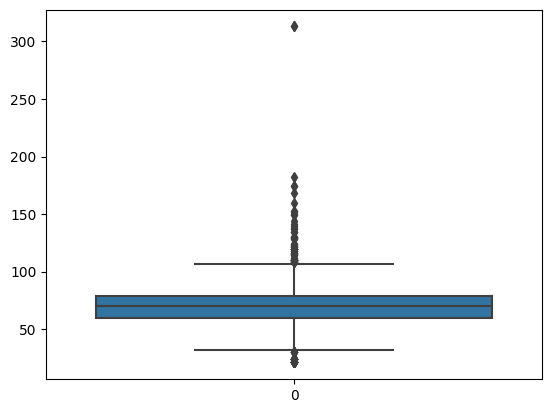

In [22]:
sns.boxplot(train['LotFrontage']);

## 4.LotArea

There is no nan values at train and test dataset. Dtype already int. It means Lot size in square feet

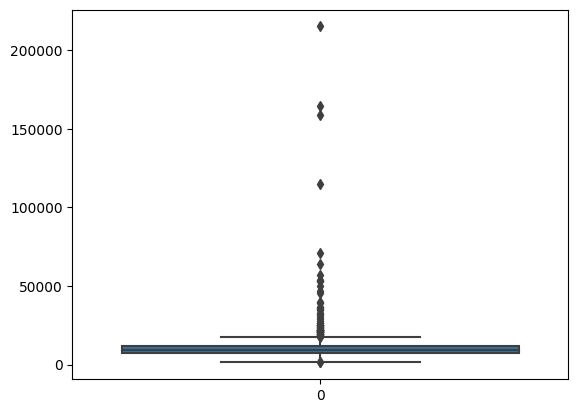

In [23]:
sns.boxplot(train['LotArea']);

## 5.Street

One Value Column, almost everone is same. We dropped it before.

## 6.Alley

Nan Column, almost every value is nan. We dropped it before.

## 7.LotShape

There is no nan values both in train and test. Dtype is object for now. It means General shape of property

In [24]:
for dataset in full_data:
    explore_col(dataset, 'LotShape')

Value Counts
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
----------------------------
Total NaN
0

***************************



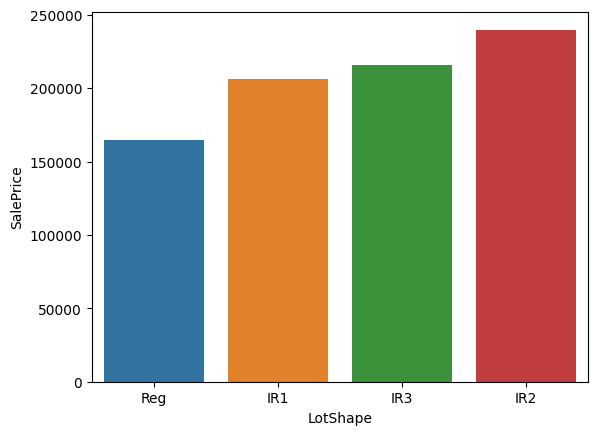

In [25]:
Corr_Plot(train, 'LotShape')

In [26]:
Encoder(train, 'LotShape')

## 8.LandContour

There is no nan values both in train and test. Dtype is object for now. It means Flatness of the property

In [27]:
for dataset in full_data:
    explore_col(dataset, 'LandContour')

Value Counts
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
----------------------------
Total NaN
0

***************************



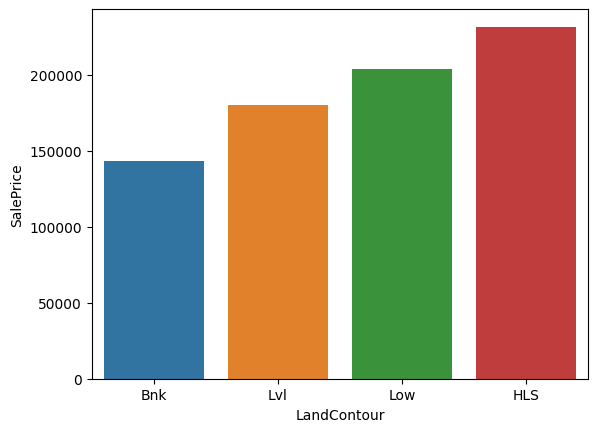

In [28]:
Corr_Plot(train, 'LandContour')

In [29]:
Encoder(train, 'LandContour')

## 9.Utilities

One Value Column, almost everone is same. We dropped it before.

## 10.LotConfig

There is no nan values both train and test. Dtype is object for now. It means Lot Configuration

In [30]:
for dataset in full_data:
    explore_col(dataset, 'LotConfig')

Value Counts
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
----------------------------
Total NaN
0

***************************



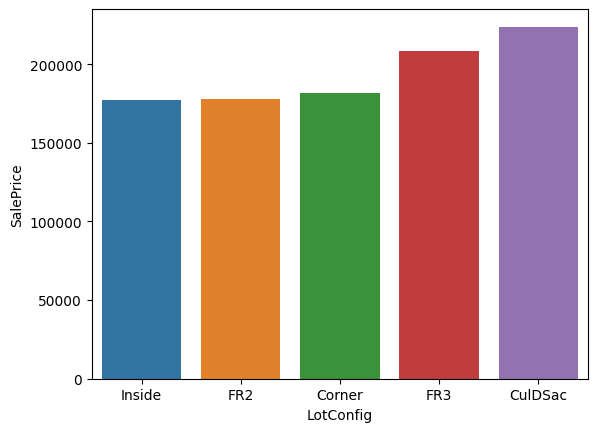

In [31]:
Corr_Plot(train, 'LotConfig')

In [32]:
Encoder(train, 'LotConfig')

## 11.LandSlope

There is no nan values both train and test. Dtype is object for now. It means Slope of property

In [33]:
for dataset in full_data:
    explore_col(dataset, 'LandSlope')

Value Counts
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
----------------------------
Total NaN
0

***************************



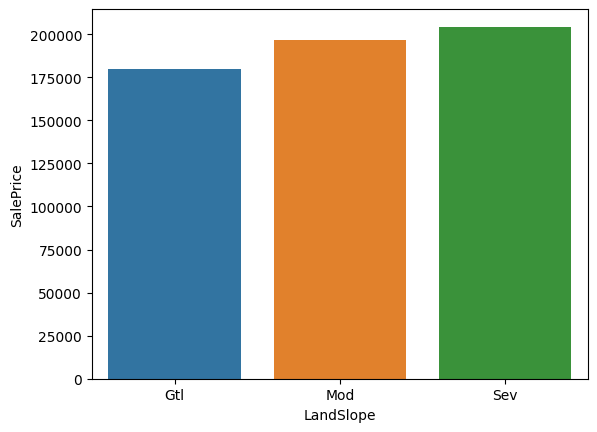

In [34]:
Corr_Plot(train, 'LandSlope')

In [35]:
Encoder(train, 'LandSlope')

## 12.Neighborhood

There is no nan values both train and test. Dtype is object for now. And There is 25 categoric value. Its a little bit problem. It means Physical locations within Ames city limits

In [36]:
for dataset in full_data:
    explore_col(dataset, 'Neighborhood')

Value Counts
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
----------------------------
Total NaN
0

***************************



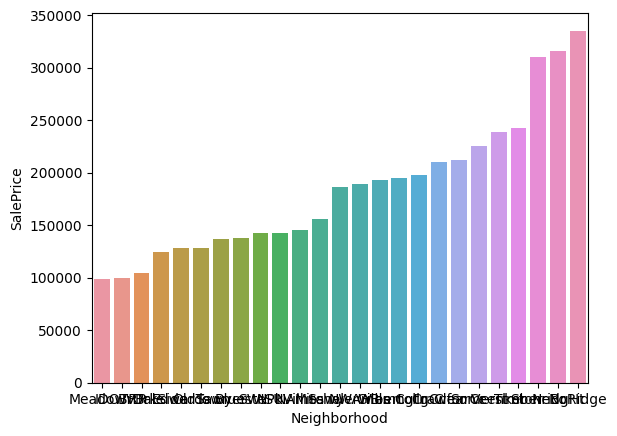

In [37]:
Corr_Plot(train, 'Neighborhood')

In [38]:
Encoder(train, 'Neighborhood')

## 13.Condition1

There is no nan values both train and test. Dtype is object for now. It means Proximity to main road or railroad

In [39]:
for dataset in full_data:
    explore_col(dataset, 'Condition1')

Value Counts
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64
----------------------------
Total NaN
0

***************************



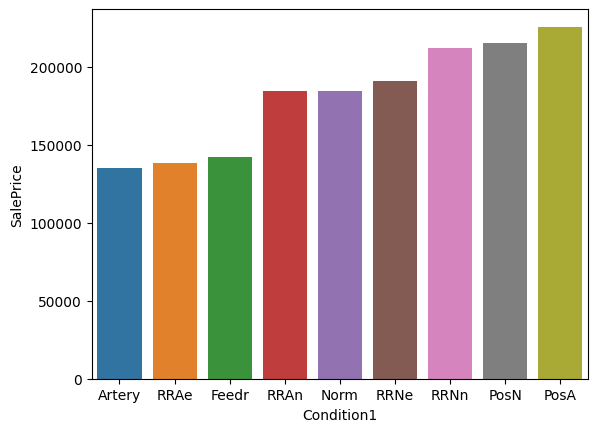

In [40]:
Corr_Plot(train, 'Condition1')

In [41]:
Encoder(train, 'Condition1')

## 14.Condition2

One Value Column, almost everone is same. We dropped it before.

## 15.BldgType

There is no nan values both train and test. Dtype is object for now. It means Type of dwelling

In [42]:
for dataset in full_data:
    explore_col(dataset, 'BldgType')

Value Counts
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64
----------------------------
Total NaN
0

***************************



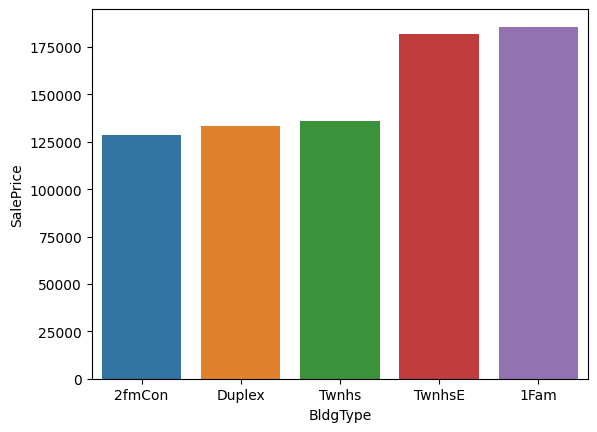

In [43]:
Corr_Plot(train, 'BldgType')

In [44]:
Encoder(train, 'BldgType')

## 16.HouseStyle

There is no nan values both train and test. Dtype is object for now. It means Style of dwelling

In [45]:
for dataset in full_data:
    explore_col(dataset, 'HouseStyle')

Value Counts
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
----------------------------
Total NaN
0

***************************



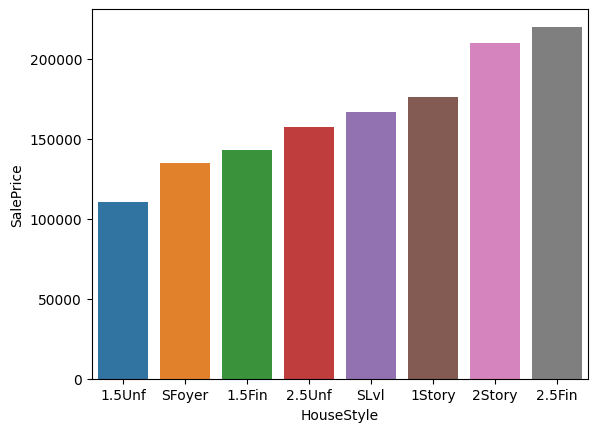

In [46]:
Corr_Plot(train, 'HouseStyle')

In [47]:
Encoder(train, 'HouseStyle')

## 17.OverallQual

There is no nan values both train and test. Dtype is float already. It means Overall material and finish quality

In [48]:
for dataset in full_data:
    explore_col(dataset, 'OverallQual')

Value Counts
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64
----------------------------
Total NaN
0

***************************



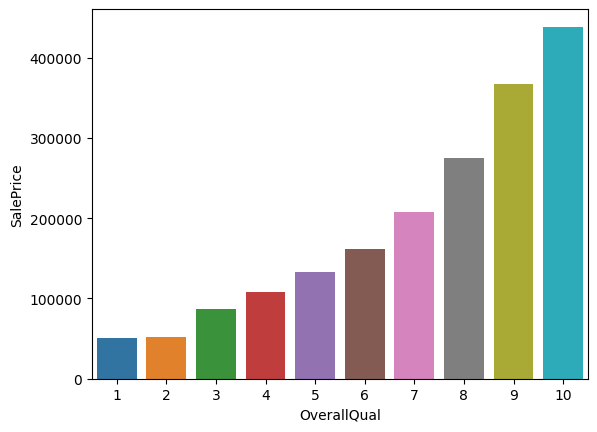

In [49]:
Corr_Plot(train, 'OverallQual')

## 18.OverallCond

There is no nan values both train and test. Dtype is float already. It means Overall condition rating

In [50]:
for dataset in full_data:
    explore_col(dataset, 'OverallCond')

Value Counts
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64
----------------------------
Total NaN
0

***************************



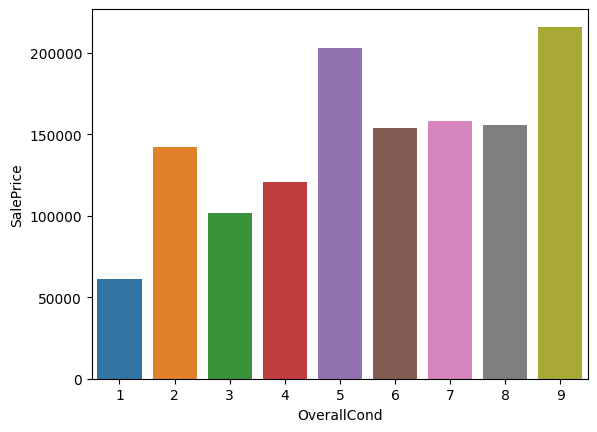

In [51]:
Corr_Plot(train, 'OverallCond')

## 19.YearBuilt

There is no nan values both train and test. Dtype is int already. It means Original construction date

In [52]:
for dataset in full_data:
    explore_col(dataset, 'YearBuilt')

Value Counts
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
2005    78
2006    71
2007    60
2004    45
2003    43
        ..
1914     1
1902     1
1907     1
1931     1
1932     1
Name: YearBuilt, Length: 106, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

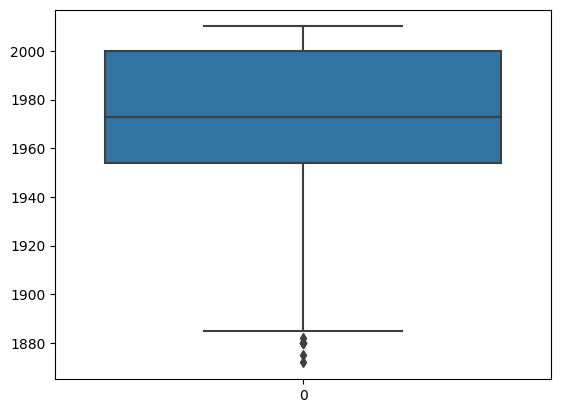

In [53]:
sns.boxplot(train['YearBuilt'])

## 20.YearRemodAdd

There is no nan values both train and test. Dtype is int already. It means Remodel date

In [54]:
for dataset in full_data:
    explore_col(dataset, 'YearRemodAdd')

Value Counts
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
1950    183
2006    105
2007     88
2005     68
2000     49
       ... 
1988      6
1983      6
1985      5
1981      4
1982      2
Name: YearRemodAdd, Length: 61, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

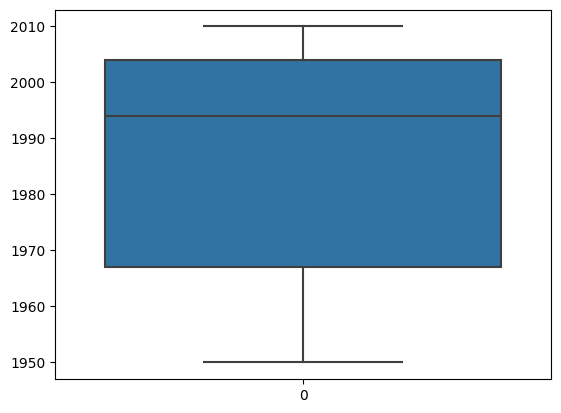

In [55]:
sns.boxplot(train['YearRemodAdd'])

## 21.RoofStyle

There is no nan values both train and test. Dtype is object for now. It means Type of roof

In [56]:
for dataset in full_data:
    explore_col(dataset, 'RoofStyle')

Value Counts
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64
----------------------------
Total NaN
0

***************************



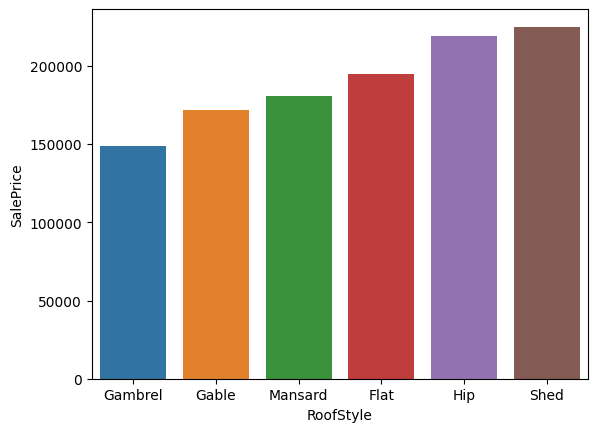

In [57]:
Corr_Plot(train, 'RoofStyle')

In [58]:
Encoder(train, 'RoofStyle')

## 22.RoofMatl

One Value Column, almost everone is same. We dropped it before.

## 23.Exterior1st

There is no nan values at train but 1 nan value in test. Dtype is object for now. It means Exterior covering on house

In [59]:
for dataset in full_data:
    explore_col(dataset, 'Exterior1st')

Value Counts
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
NaN          1
CBlock       1
Name: Exterior1st, dtype: int64
----------------------------
Total NaN
1

***************************



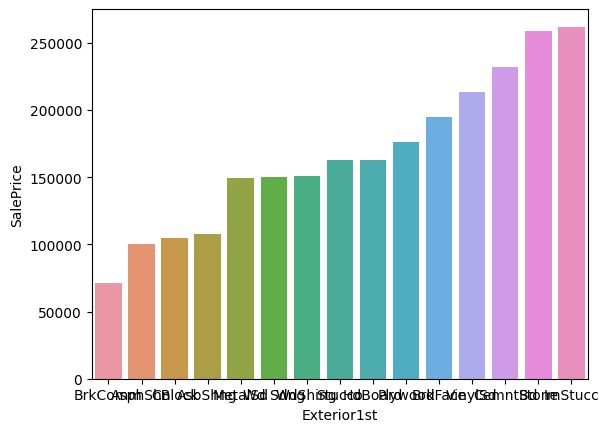

In [60]:
Corr_Plot(train, 'Exterior1st')

In [61]:
Encoder(train, 'Exterior1st')

In [62]:
fillna(test, 'Exterior1st')

## 24.Exterior2nd

There is no nan values at train but 1 nan value in test. Dtype is object for now. It means Exterior covering on house (if more than one material)

In [63]:
for dataset in full_data:
    explore_col(dataset, 'Exterior2nd')

Value Counts
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
NaN          1
Stone        1
Name: Exterior2nd, dtype: int64
----------------------------
Total NaN
1

***************************



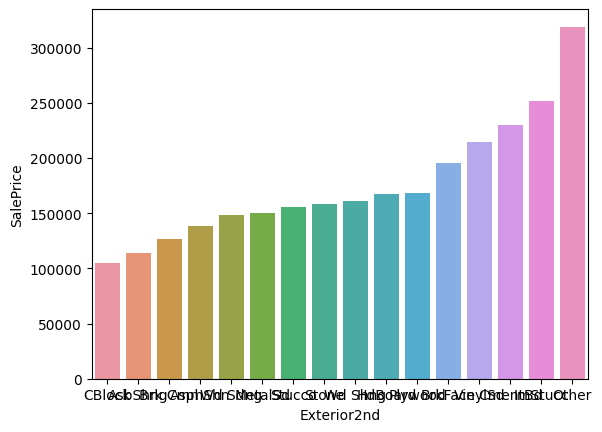

In [64]:
Corr_Plot(train, 'Exterior2nd')

In [65]:
Encoder(train, 'Exterior2nd')

In [66]:
fillna(test, 'Exterior2nd')

## 25.MasVnrType

There is 8 nan values at train but 16 nan value in test. Dtype is object for now. It means Masonry veneer type

In [67]:
for dataset in full_data:
    explore_col(dataset, 'MasVnrType')

Value Counts
None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64
----------------------------
Total NaN
8

***************************

Value Counts
None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64
----------------------------
Total NaN
16

***************************



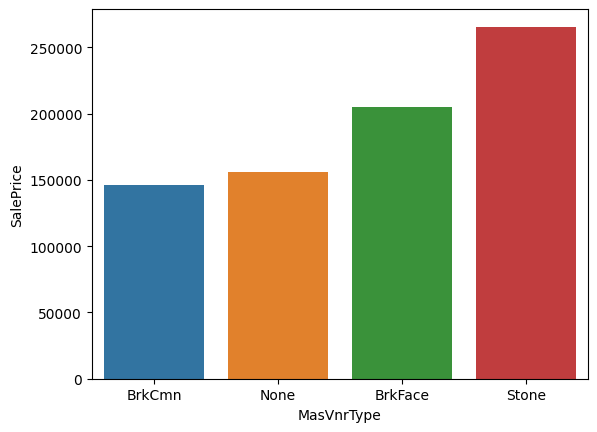

In [68]:
Corr_Plot(train, 'MasVnrType')

In [69]:
# Encoder(train, 'MasVnrType') # We decided to map this feature manually because None must be 0.

In [70]:
for dataset in full_data:
    dataset['MasVnrType'] = dataset['MasVnrType'].map({'None' : 0 , 
                                                    'BrkCmn' : 1,
                                                    'BrkFace' : 2,
                                                    'Stone' : 3,
                                                     }).fillna(0).astype('int32')

## 26.MasVnrArea

There is 8 nan values at train but 15 nan value in test. Dtype is already float. It means Masonry veneer area in square feet

In [71]:
for dataset in full_data:
    explore_col(dataset, 'MasVnrArea')

Value Counts
0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64
----------------------------
Total NaN
8

***************************

Value Counts
0.0       877
NaN        15
176.0      10
144.0       9
120.0       8
         ... 
647.0       1
1290.0      1
495.0       1
292.0       1
382.0       1
Name: MasVnrArea, Length: 304, dtype: int64
----------------------------
Total NaN
15

***************************



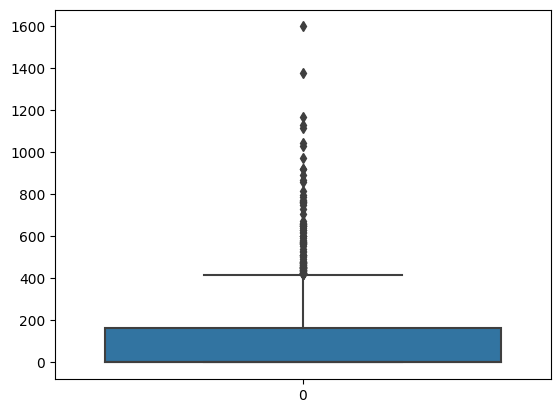

In [72]:
sns.boxplot(train['MasVnrArea'] );

In [73]:
Encoder(train, 'MasVnrArea')

In [74]:
fillna(train, 'MasVnrArea')
fillna(test, 'MasVnrArea')

## 27.ExterQual

There is no nan values both train and test. Dtype is object for now. It means Exterior material quality

In [75]:
for dataset in full_data:
    explore_col(dataset, 'ExterQual')

Value Counts
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64
----------------------------
Total NaN
0

***************************



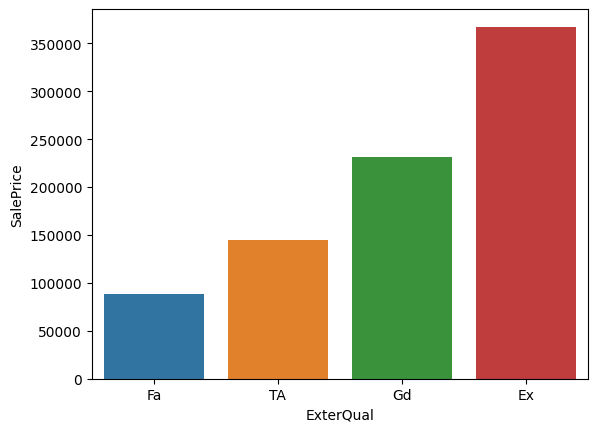

In [76]:
Corr_Plot(train, 'ExterQual')

In [77]:
Encoder(train, 'ExterQual')

## 28.ExterCond

There is no nan values both train and test. Dtype is object for now. It means Present condition of the material on the exterior

In [78]:
for dataset in full_data:
    explore_col(dataset, 'ExterCond')

Value Counts
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64
----------------------------
Total NaN
0

***************************



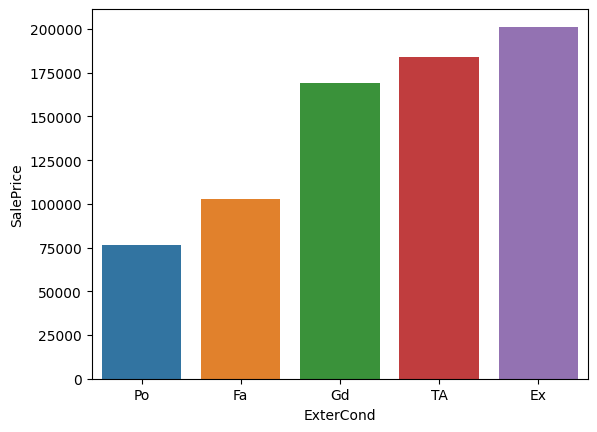

In [79]:
Corr_Plot(train, 'ExterCond')

In [80]:
Encoder(train, 'ExterCond')

## 29.Foundation

There is no nan values both train and test. Dtype is object for now. It means Type of foundation

In [81]:
for dataset in full_data:
    explore_col(dataset, 'Foundation')

Value Counts
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64
----------------------------
Total NaN
0

***************************



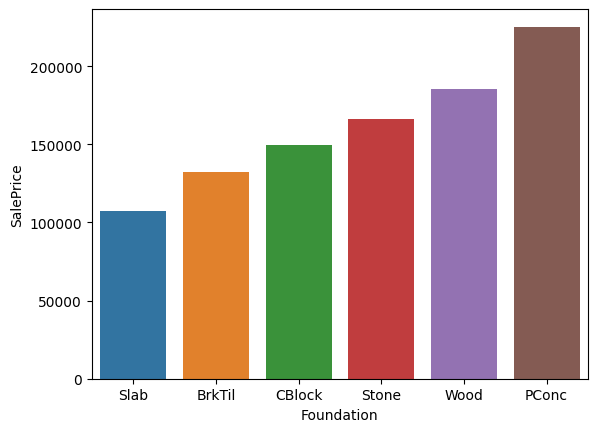

In [82]:
Corr_Plot(train, 'Foundation')

In [83]:
Encoder(train, 'Foundation')

## 30.BsmtQual

There is 37 nan values at train and 44 nan value in test. Dtype is object for now. It means Height of the basement

In [84]:
for dataset in full_data:
    explore_col(dataset, 'BsmtQual')

Value Counts
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
----------------------------
Total NaN
37

***************************

Value Counts
TA     634
Gd     591
Ex     137
Fa      53
NaN     44
Name: BsmtQual, dtype: int64
----------------------------
Total NaN
44

***************************



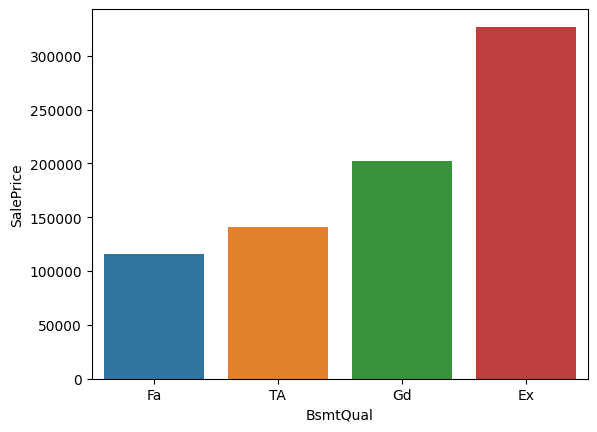

In [85]:
Corr_Plot(train, 'BsmtQual')

In [86]:
Encoder(train, 'BsmtQual')

In [87]:
fillna(train, 'BsmtQual')
fillna(test, 'BsmtQual')

## 31.BsmtCond

There is 37 nan values at train and 45 nan value in test. Dtype is object for now. It means General condition of the basement

In [88]:
for dataset in full_data:
    explore_col(dataset, 'BsmtCond')

Value Counts
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
----------------------------
Total NaN
37

***************************

Value Counts
TA     1295
Fa       59
Gd       57
NaN      45
Po        3
Name: BsmtCond, dtype: int64
----------------------------
Total NaN
45

***************************



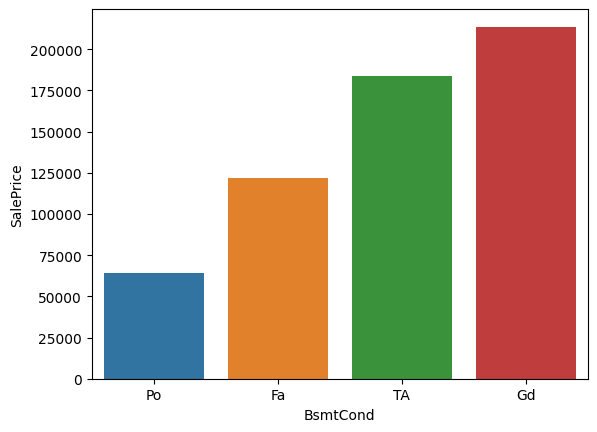

In [89]:
Corr_Plot(train, 'BsmtCond')

In [90]:
Encoder(train, 'BsmtCond')

In [91]:
fillna(train, 'BsmtCond')
fillna(test, 'BsmtCond')

## 32.BsmtExposure

There is 38 nan values at train and 44 nan value in test. Dtype is object for now. It means Walkout or garden level basement walls

In [92]:
for dataset in full_data:
    explore_col(dataset, 'BsmtExposure')

Value Counts
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
----------------------------
Total NaN
38

***************************

Value Counts
No     951
Av     197
Gd     142
Mn     125
NaN     44
Name: BsmtExposure, dtype: int64
----------------------------
Total NaN
44

***************************



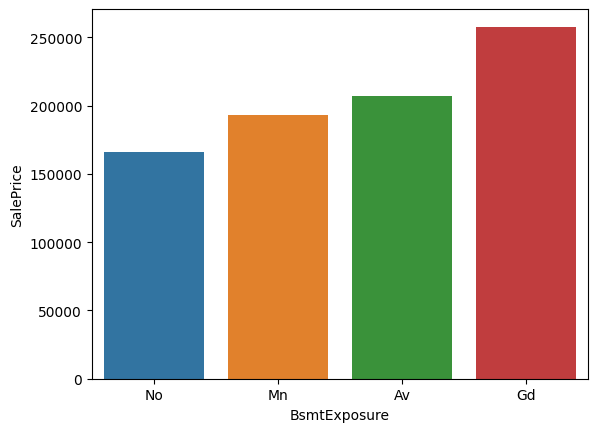

In [93]:
Corr_Plot(train, 'BsmtExposure')

In [94]:
Encoder(train, 'BsmtExposure')

In [95]:
fillna(train, 'BsmtExposure')
fillna(test, 'BsmtExposure')

## 33.BsmtFinType1

There is 37 nan values at train and 42 nan value in test. Dtype is object for now. It means Quality of basement finished area

In [96]:
for dataset in full_data:
    explore_col(dataset, 'BsmtFinType1')

Value Counts
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
----------------------------
Total NaN
37

***************************

Value Counts
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64
----------------------------
Total NaN
42

***************************



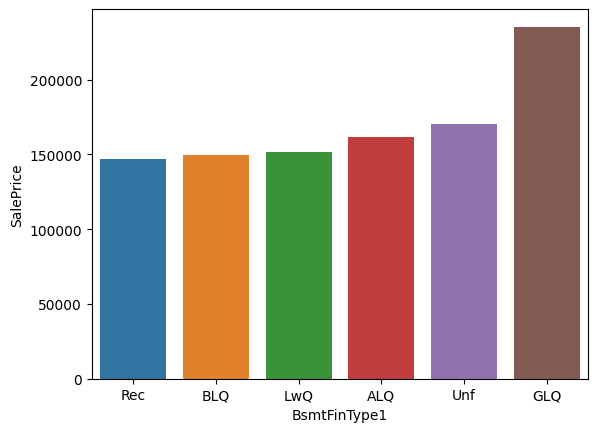

In [97]:
Corr_Plot(train, 'BsmtFinType1')

In [98]:
Encoder(train, 'BsmtFinType1')

In [99]:
fillna(train, 'BsmtFinType1')
fillna(test, 'BsmtFinType1')

## 34.BsmtFinSF1

There is no nan values at train but 1 nan value in test. Dtype is int already. It means Type 1 finished square feet

In [100]:
for dataset in full_data:
    explore_col(dataset, 'BsmtFinSF1')

Value Counts
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 670, dtype: int64
----------------------------
Total NaN
1

***************************



<Axes: >

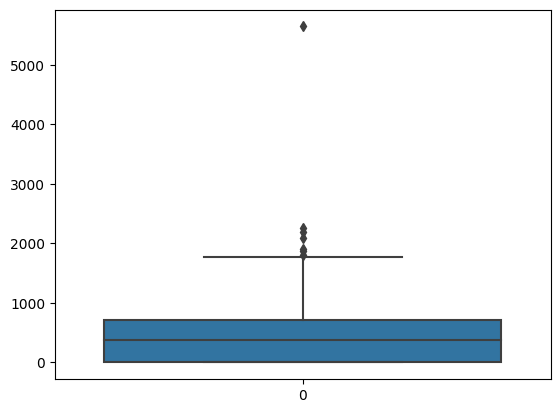

In [101]:
sns.boxplot(train['BsmtFinSF1'])

In [102]:
fillna(test, 'BsmtFinSF1')

## 35.BsmtFinType2

There is 38 nan values at train and 42 nan value in test. Dtype is object for now. It means Quality of second finished area (if present)

In [103]:
for dataset in full_data:
    explore_col(dataset, 'BsmtFinType2')

Value Counts
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
----------------------------
Total NaN
38

***************************

Value Counts
Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64
----------------------------
Total NaN
42

***************************



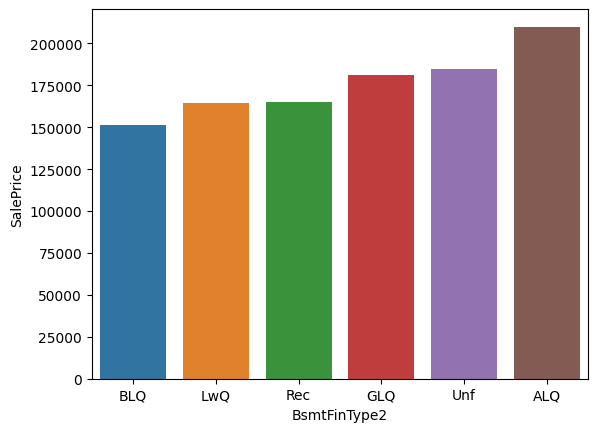

In [104]:
Corr_Plot(train, 'BsmtFinType2')

In [105]:
Encoder(train, 'BsmtFinType2')

In [106]:
fillna(train, 'BsmtFinType2')
fillna(test, 'BsmtFinType2')

## 36.BsmtFinSF2

There is no nan values at train but 1 nan value in test. Dtype is int already. It means Type 2 finished square feet

In [107]:
for dataset in full_data:
    explore_col(dataset, 'BsmtFinSF2')

Value Counts
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0.0      1278
483.0       3
162.0       3
294.0       3
144.0       2
         ... 
186.0       1
449.0       1
48.0        1
613.0       1
344.0       1
Name: BsmtFinSF2, Length: 162, dtype: int64
----------------------------
Total NaN
1

***************************



<Axes: >

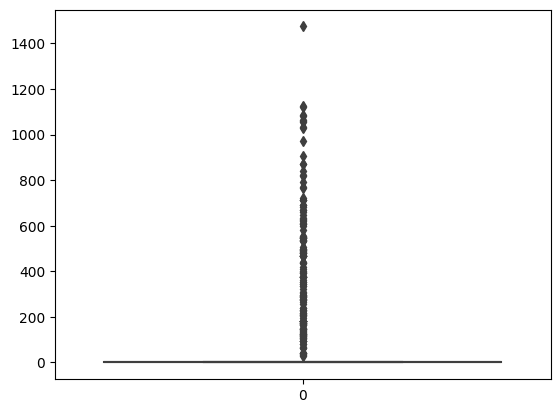

In [108]:
sns.boxplot(train['BsmtFinSF2'])

In [109]:
fillna(test, 'BsmtFinSF2')

## 36.BsmtUnfSF

There is no nan values at train but 1 nan value in test. Dtype is int already. It means Unfinished square feet of basement area

In [110]:
for dataset in full_data:
    explore_col(dataset, 'BsmtUnfSF')

Value Counts
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0.0       123
384.0      11
624.0       8
348.0       7
480.0       7
         ... 
1444.0      1
273.0       1
469.0       1
692.0       1
1503.0      1
Name: BsmtUnfSF, Length: 794, dtype: int64
----------------------------
Total NaN
1

***************************



<Axes: >

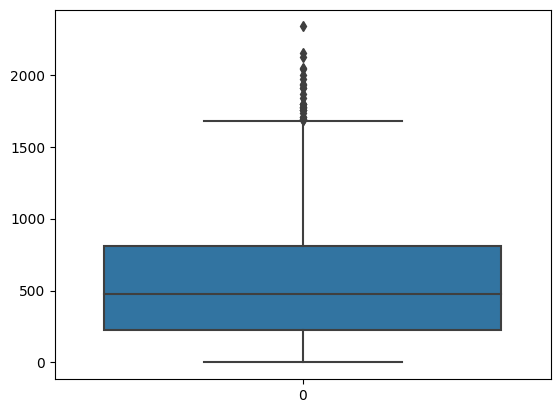

In [111]:
sns.boxplot(train['BsmtUnfSF'])

In [112]:
fillna(test, 'BsmtUnfSF')

## 37.TotalBsmtSF

There is no nan values at train but 1 nan value in test. Dtype is int already. It means Total square feet of basement area

In [113]:
for dataset in full_data:
    explore_col(dataset, 'TotalBsmtSF')

Value Counts
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0.0       41
864.0     39
960.0     13
546.0     12
768.0     12
          ..
1146.0     1
1415.0     1
764.0      1
1367.0     1
996.0      1
Name: TotalBsmtSF, Length: 737, dtype: int64
----------------------------
Total NaN
1

***************************



<Axes: >

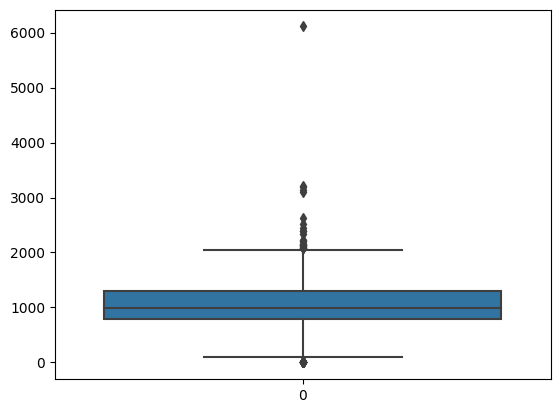

In [114]:
sns.boxplot(train['TotalBsmtSF']) # This can be outlier.

In [115]:
fillna(test, 'TotalBsmtSF')

## 38.Heating

There is no nan values at both train and test. Dtype is object for now. It means Type of heating

In [116]:
for dataset in full_data:
    explore_col(dataset, 'Heating')

Value Counts
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
GasA    1446
GasW       9
Grav       2
Wall       2
Name: Heating, dtype: int64
----------------------------
Total NaN
0

***************************



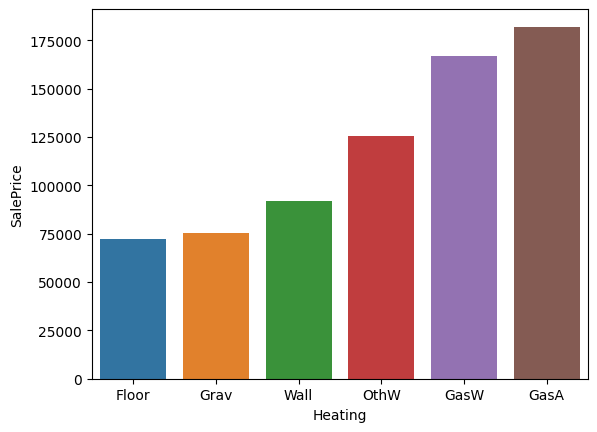

In [117]:
Corr_Plot(train, 'Heating')

In [118]:
Encoder(train, 'Heating')

## 39.HeatingQC

There is no nan values at both train and test. Dtype is object for now. It means heating quality anc condition

In [119]:
for dataset in full_data:
    explore_col(dataset, 'HeatingQC')

Value Counts
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64
----------------------------
Total NaN
0

***************************



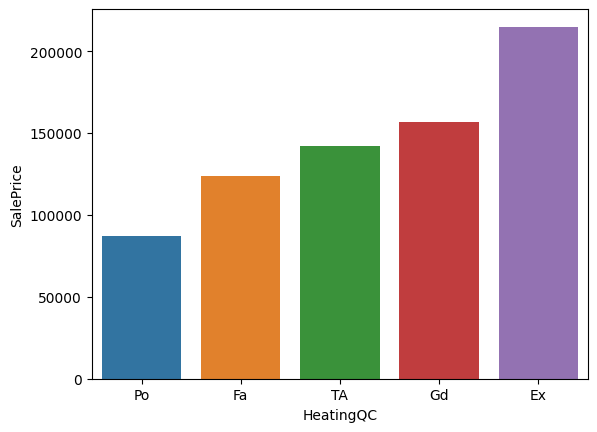

In [120]:
Corr_Plot(train, 'HeatingQC')

In [121]:
Encoder(train, 'HeatingQC')

## 40.CentralAir

There is no nan values at both train and test. Dtype is object for now. It means Central air conditioning

In [122]:
for dataset in full_data:
    explore_col(dataset, 'CentralAir')

Value Counts
Y    1365
N      95
Name: CentralAir, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Y    1358
N     101
Name: CentralAir, dtype: int64
----------------------------
Total NaN
0

***************************



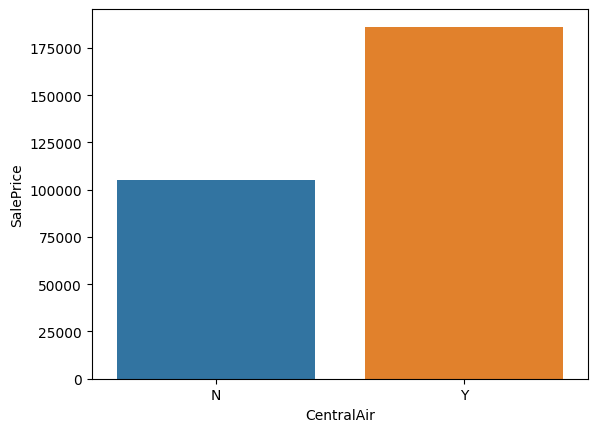

In [123]:
Corr_Plot(train, 'CentralAir')

In [124]:
Encoder(train, 'CentralAir')

## 40.Electrical

There is 1 nan values at train and no nan values at test. Dtype is object for now. It means Electrical system

In [125]:
for dataset in full_data:
    explore_col(dataset, 'Electrical')

Value Counts
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64
----------------------------
Total NaN
1

***************************

Value Counts
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64
----------------------------
Total NaN
0

***************************



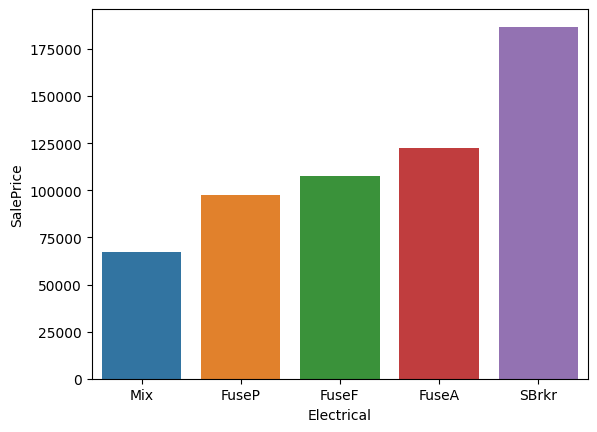

In [126]:
Corr_Plot(train, 'Electrical')

In [127]:
Encoder(train, 'Electrical')

In [128]:
fillna(train, 'Electrical')

## 41.1stFlrSF

There is no nan values at both train and test. Dtype is int already. It means First Floor square feet

In [129]:
for dataset in full_data:
    explore_col(dataset, '1stFlrSF')

Value Counts
864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
864     21
1040    12
546     12
960     11
936     10
        ..
1372     1
1460     1
1578     1
2006     1
996      1
Name: 1stFlrSF, Length: 789, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

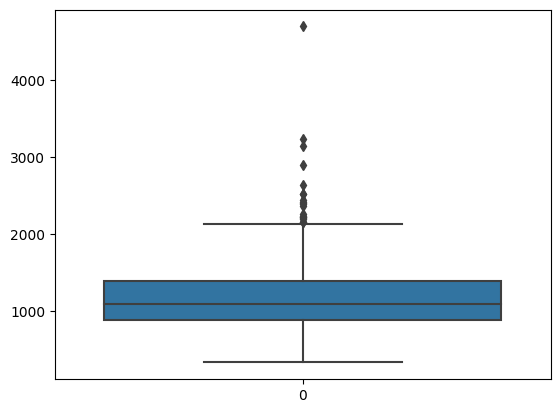

In [130]:
sns.boxplot(train['1stFlrSF']) # There can be outlier

## 42.2ndFlrSF

There is no nan values at both train and test. Dtype is int already. It means Second floor square feet

In [131]:
for dataset in full_data:
    explore_col(dataset, '2ndFlrSF')

Value Counts
0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0       839
546      15
504       8
728       8
886       7
       ... 
919       1
520       1
1250      1
1061      1
1004      1
Name: 2ndFlrSF, Length: 407, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

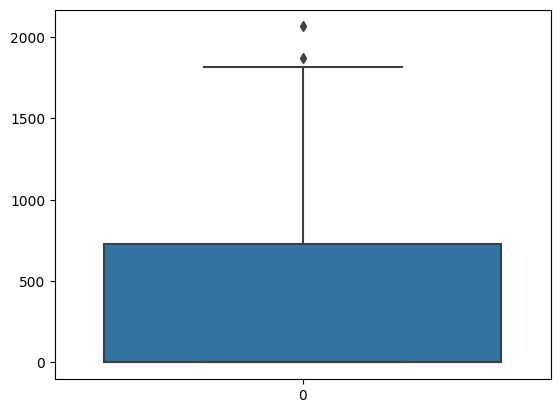

In [132]:
sns.boxplot(train['2ndFlrSF'])

## 43.LowQualFinSF

One Value Column, almost everone is same. We dropped it before.

## 44. GrLivArea

There is no nan values at both train and test. Dtype is int already. It means Above grade (ground) living area square feet

In [133]:
for dataset in full_data:
    explore_col(dataset, 'GrLivArea')

Value Counts
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
864     19
1092    18
1040    11
1456    10
1200     9
        ..
1570     1
2133     1
1988     1
1036     1
970      1
Name: GrLivArea, Length: 879, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

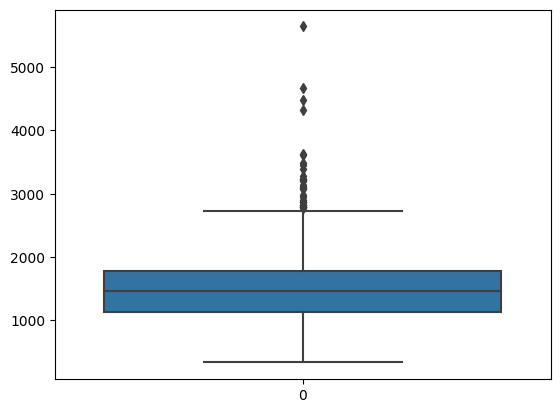

In [134]:
sns.boxplot(train['GrLivArea'])

## 45.BsmtFullBath

There is no nan values in train but 2 nan values in test. Dtype is int already. It means Basement full bathrooms

In [135]:
for dataset in full_data:
    explore_col(dataset, 'BsmtFullBath')

Value Counts
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0.0    849
1.0    584
2.0     23
NaN      2
3.0      1
Name: BsmtFullBath, dtype: int64
----------------------------
Total NaN
2

***************************



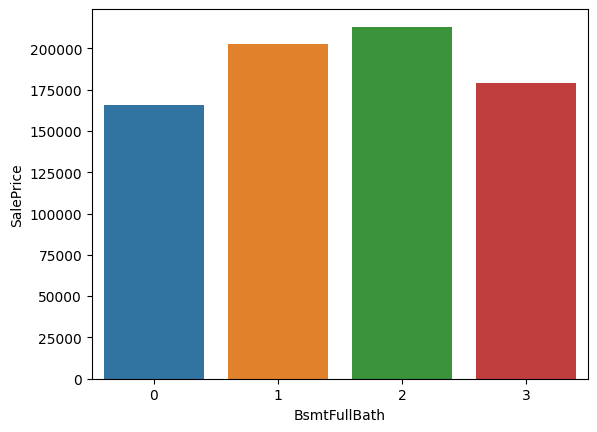

In [136]:
Corr_Plot(train , 'BsmtFullBath')

In [137]:
fillna(test, 'BsmtFullBath')

## 46.BsmtHalfBath

There is no nan values in train but 2 nan values in test. Dtype is int already. It means Basement half bathrooms

In [138]:
for dataset in full_data:
    explore_col(dataset, 'BsmtHalfBath')

Value Counts
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0.0    1364
1.0      91
NaN       2
2.0       2
Name: BsmtHalfBath, dtype: int64
----------------------------
Total NaN
2

***************************



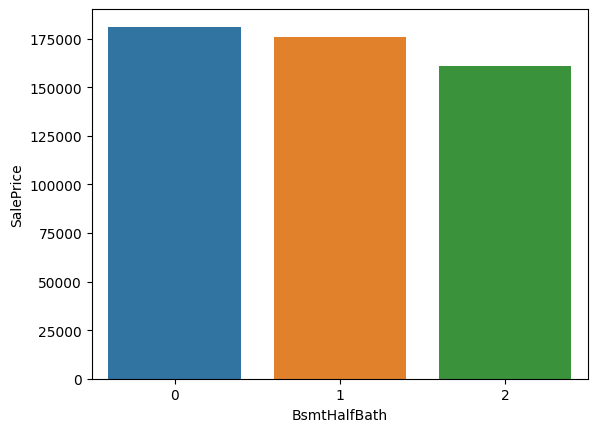

In [139]:
Corr_Plot(train, 'BsmtHalfBath')

In [140]:
fillna(test, 'BsmtHalfBath')

## 47.FullBath

There is no nan values in both train and test. Dtype is int already. It means Full bathrooms above grade

In [141]:
for dataset in full_data:
    explore_col(dataset, 'FullBath')

Value Counts
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
2    762
1    659
3     31
4      4
0      3
Name: FullBath, dtype: int64
----------------------------
Total NaN
0

***************************



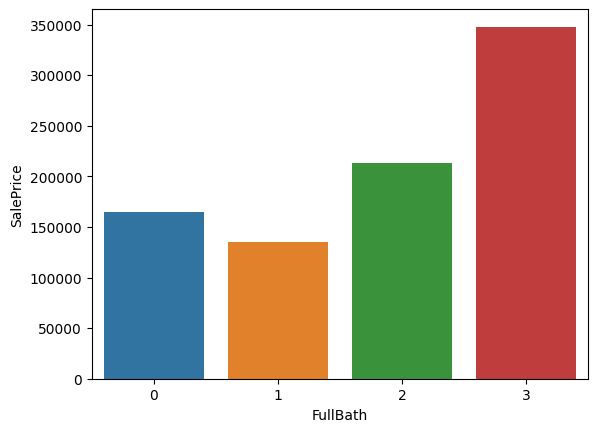

In [142]:
Corr_Plot(train, 'FullBath')

## 48.HalfBath

There is no nan values in both train and test. Dtype is int already. It means half bathrooms above grade

In [143]:
for dataset in full_data:
    explore_col(dataset, 'HalfBath')

Value Counts
0    913
1    535
2     12
Name: HalfBath, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0    921
1    525
2     13
Name: HalfBath, dtype: int64
----------------------------
Total NaN
0

***************************



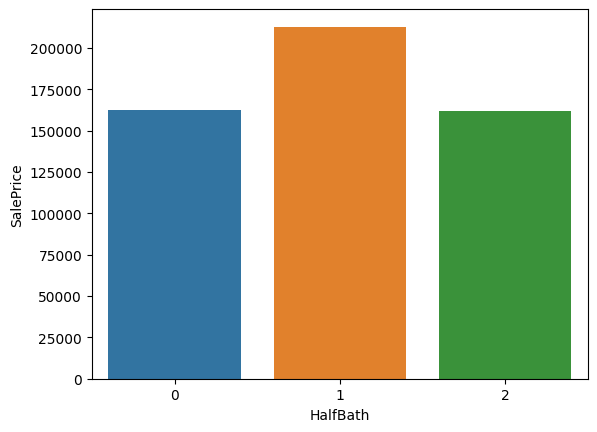

In [144]:
Corr_Plot(train, 'HalfBath')

## 49.BedroomAbvGr

There is no nan values in both train and test. Dtype is int already. It means Number of bedrooms above basement level

In [145]:
for dataset in full_data:
    explore_col(dataset, 'BedroomAbvGr')

Value Counts
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64
----------------------------
Total NaN
0

***************************



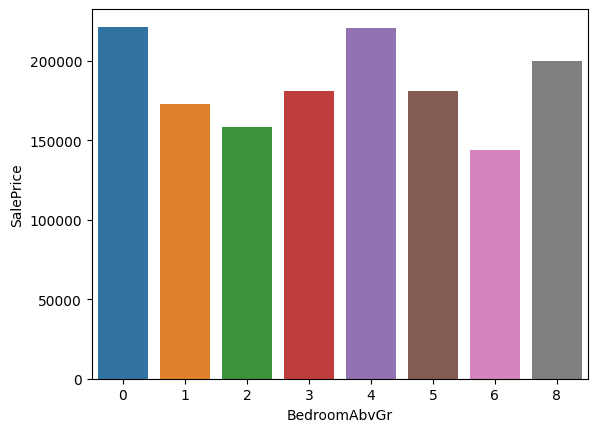

In [146]:
Corr_Plot(train, 'BedroomAbvGr')

## 50.KitchenAbvGr

There is no nan values in both train and test. Dtype is int already. It means Number of kitchens

In [147]:
for dataset in full_data:
    explore_col(dataset, 'KitchenAbvGr')

Value Counts
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64
----------------------------
Total NaN
0

***************************



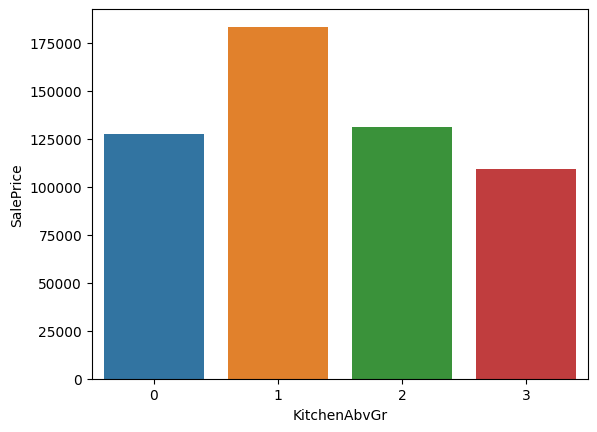

In [148]:
Corr_Plot(train, 'KitchenAbvGr')

## 51.KitchenQual

There is no nan values in train but 1 nan value in test. Dtype is object for now. It means Kitchen quality

In [149]:
for dataset in full_data:
    explore_col(dataset, 'KitchenQual')

Value Counts
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
TA     757
Gd     565
Ex     105
Fa      31
NaN      1
Name: KitchenQual, dtype: int64
----------------------------
Total NaN
1

***************************



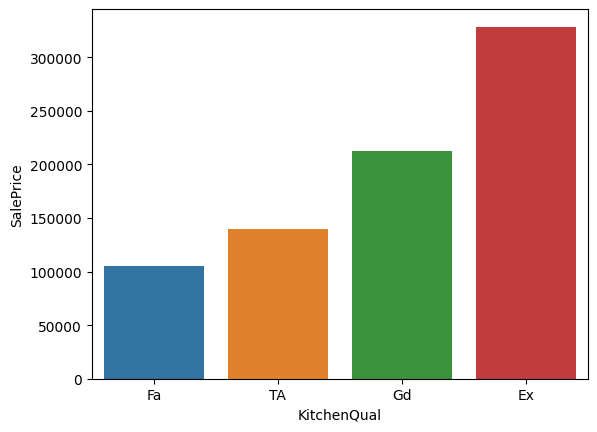

In [150]:
Corr_Plot(train, 'KitchenQual')

In [151]:
Encoder(train, 'KitchenQual')

In [152]:
fillna(test, 'KitchenQual')

## 52.TotRmsAbvGrd

There is no nan values in both train and test. Dtype is int already. It means Total rooms above grade (does not include bathrooms)

In [153]:
for dataset in full_data:
    explore_col(dataset, 'TotRmsAbvGrd')

Value Counts
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
13      1
15      1
Name: TotRmsAbvGrd, dtype: int64
----------------------------
Total NaN
0

***************************



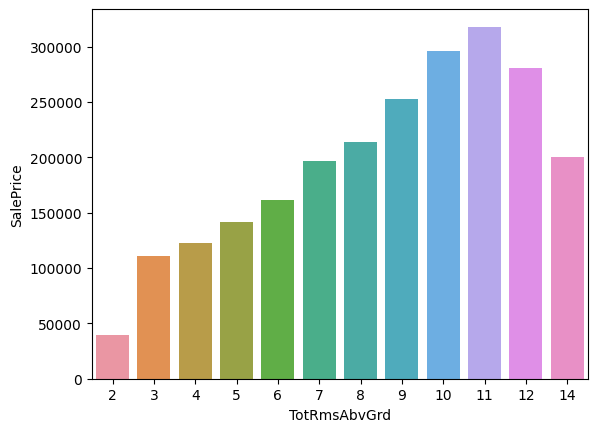

In [154]:
Corr_Plot(train, 'TotRmsAbvGrd')

## 53.Functional

There is no nan values in train but 2 nan value in test. Dtype is object for now. It means Home functionality rating

In [155]:
for dataset in full_data:
    explore_col(dataset, 'Functional')

Value Counts
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
NaN        2
Sev        1
Name: Functional, dtype: int64
----------------------------
Total NaN
2

***************************



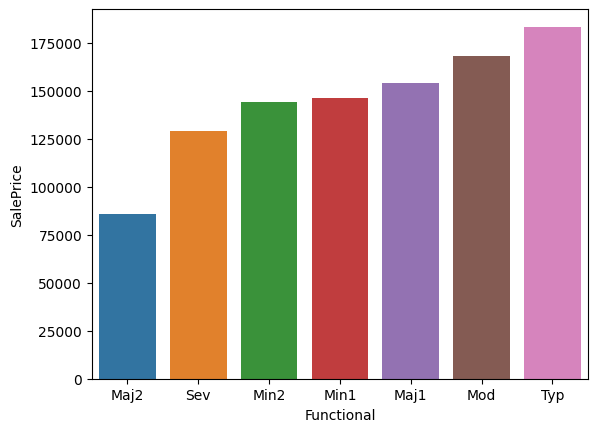

In [156]:
Corr_Plot(train, 'Functional')

In [157]:
Encoder(train, 'Functional')

In [158]:
fillna(test, 'Functional')

## 54.Fireplaces

There is no nan values in both train and test. Dtype is int already. It means Number of fireplaces

In [159]:
for dataset in full_data:
    explore_col(dataset, 'Fireplaces')

Value Counts
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64
----------------------------
Total NaN
0

***************************



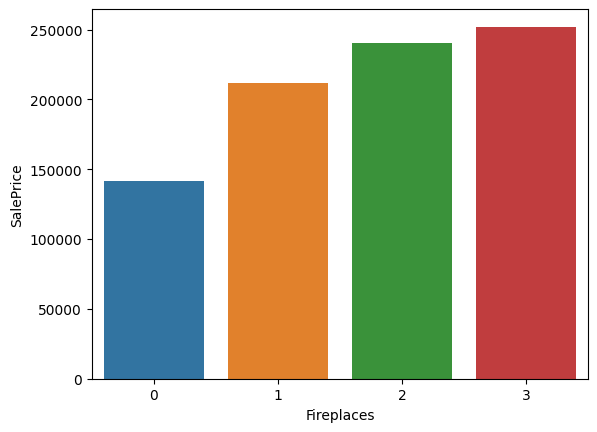

In [160]:
Corr_Plot(train, 'Fireplaces')

## 55.FireplaceQu

There is 690 nan values in train but 730 nan value in test. Dtype is object for now. It means Home Fireplace quality

In [161]:
for dataset in full_data:
    explore_col(dataset, 'FireplaceQu')

Value Counts
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
----------------------------
Total NaN
690

***************************

Value Counts
NaN    730
Gd     364
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64
----------------------------
Total NaN
730

***************************



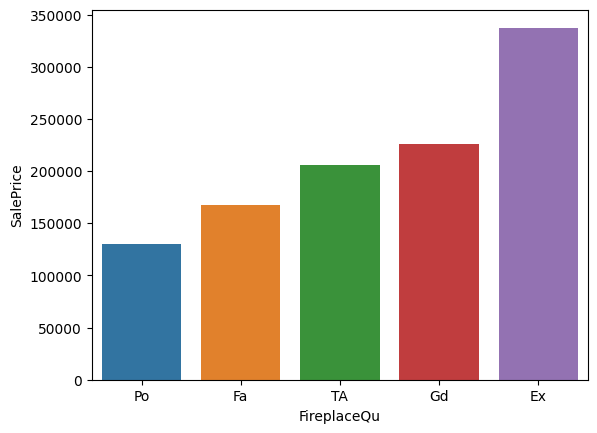

In [162]:
Corr_Plot(train, 'FireplaceQu')

In [163]:
# train.drop('FireplaceQu' , axis = 1 , inplace= True)
# test.drop('FireplaceQu' , axis = 1 , inplace= True)

In [164]:
Encoder(train, 'FireplaceQu')

In [165]:
fillna(train, 'FireplaceQu' , fill_value= 0) # All filled same.
fillna(test, 'FireplaceQu', fill_value= 0) # All filled same.

## 56.GarageType

There is 81 nan values in train but 76 nan value in test. Dtype is object for now. It means Garage location

In [166]:
for dataset in full_data:
    explore_col(dataset, 'GarageType')

Value Counts
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
----------------------------
Total NaN
81

***************************

Value Counts
Attchd     853
Detchd     392
BuiltIn     98
NaN         76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64
----------------------------
Total NaN
76

***************************



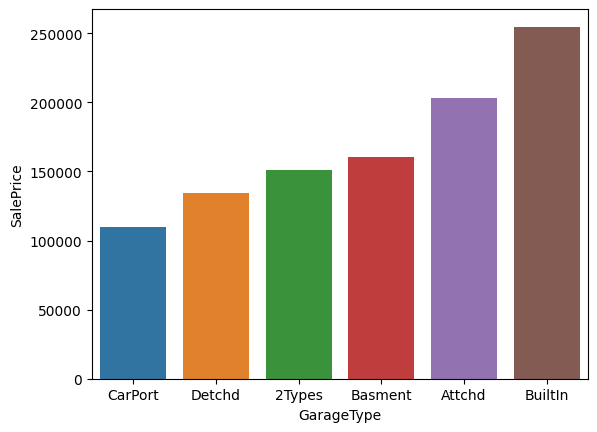

In [167]:
Corr_Plot(train, 'GarageType')

In [168]:
Encoder(train, 'GarageType')

In [169]:
fillna(train, 'GarageType' , fill_value= 0)
fillna(test, 'GarageType' , fill_value= 0)

## 57.GarageYrBlt

There is 81 nan values in train but 78 nan value in test. Dtype float already. It means Year garage was built

In [170]:
for dataset in full_data:
    explore_col(dataset, 'GarageYrBlt')

Value Counts
NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64
----------------------------
Total NaN
81

***************************

Value Counts
NaN       78
2005.0    77
2007.0    66
2006.0    56
2004.0    46
          ..
1918.0     1
1895.0     1
1932.0     1
1916.0     1
1919.0     1
Name: GarageYrBlt, Length: 98, dtype: int64
----------------------------
Total NaN
78

***************************



<Axes: >

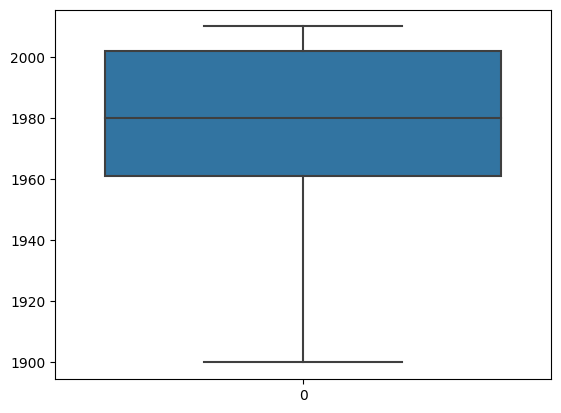

In [171]:
sns.boxplot(train['GarageYrBlt'])

In [172]:
fillna(train , 'GarageYrBlt' , fill_value= 'median')
fillna(test , 'GarageYrBlt' , fill_value= 'median')

## 58.GarageFinish

There is 81 nan values in train but 78 nan value in test. Dtype is object for now. It means Interior finish of the garage

In [173]:
for dataset in full_data:
    explore_col(dataset, 'GarageFinish')

Value Counts
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64
----------------------------
Total NaN
81

***************************

Value Counts
Unf    625
RFn    389
Fin    367
NaN     78
Name: GarageFinish, dtype: int64
----------------------------
Total NaN
78

***************************



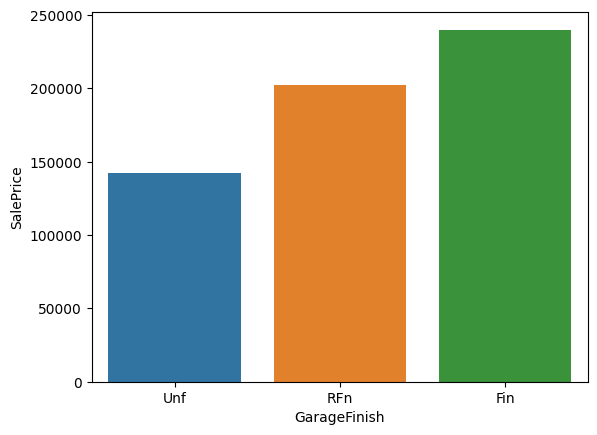

In [174]:
Corr_Plot(train, 'GarageFinish')

In [175]:
Encoder(train, 'GarageFinish')

In [176]:
fillna(train, 'GarageFinish' , fill_value=0)
fillna(test, 'GarageFinish' , fill_value=0)

## 59.GarageCars

There is no nan values in train but 1 nan value in test. Dtype is float already. It means Size of garage in car capacity

In [177]:
for dataset in full_data:
    explore_col(dataset, 'GarageCars')

Value Counts
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
NaN      1
Name: GarageCars, dtype: int64
----------------------------
Total NaN
1

***************************



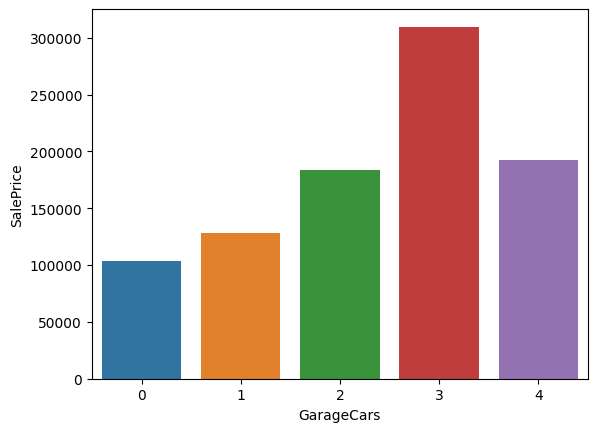

In [178]:
Corr_Plot(train, 'GarageCars')

In [179]:
fillna(test, 'GarageCars' , fill_value= 0)

## 60.GarageArea

There is no nan values in train but 1 nan value in test. Dtype is float already. It means Size of garage in car capacity

In [180]:
for dataset in full_data:
    explore_col(dataset, 'GarageArea')

Value Counts
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0.0       76
576.0     50
440.0     47
484.0     34
400.0     33
          ..
267.0      1
292.0      1
301.0      1
1488.0     1
682.0      1
Name: GarageArea, Length: 460, dtype: int64
----------------------------
Total NaN
1

***************************



<Axes: >

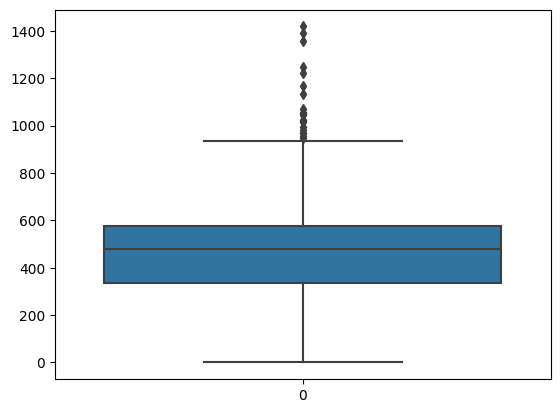

In [181]:
sns.boxplot(train['GarageArea'])

In [182]:
fillna(test , 'GarageArea' , fill_value=0)

## 61.GarageQual

There is 81 nan values in train but 78 nan value in test. Dtype is object for now. It means Garage quality

In [183]:
for dataset in full_data:
    explore_col(dataset, 'GarageQual')

Value Counts
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64
----------------------------
Total NaN
81

***************************

Value Counts
TA     1293
NaN      78
Fa       76
Gd       10
Po        2
Name: GarageQual, dtype: int64
----------------------------
Total NaN
78

***************************



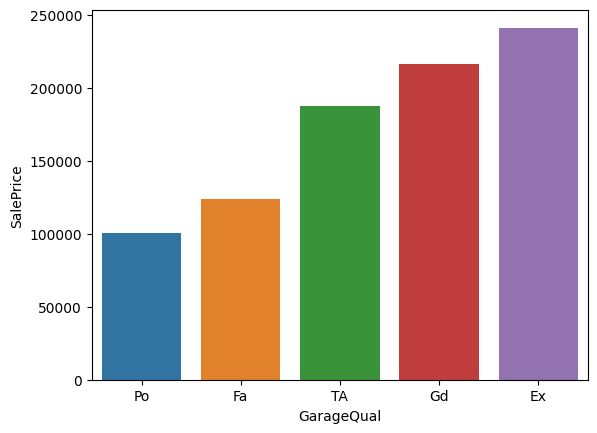

In [184]:
Corr_Plot(train, 'GarageQual')

In [185]:
Encoder(train, 'GarageQual')

In [186]:
fillna(train, 'GarageQual' , fill_value=0)
fillna(test, 'GarageQual' , fill_value=0)

## 62.GarageCond

There is 81 nan values in train but 78 nan value in test. Dtype is object for now. It means Garage condition

In [187]:
for dataset in full_data:
    explore_col(dataset, 'GarageCond')

Value Counts
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64
----------------------------
Total NaN
81

***************************

Value Counts
TA     1328
NaN      78
Fa       39
Po        7
Gd        6
Ex        1
Name: GarageCond, dtype: int64
----------------------------
Total NaN
78

***************************



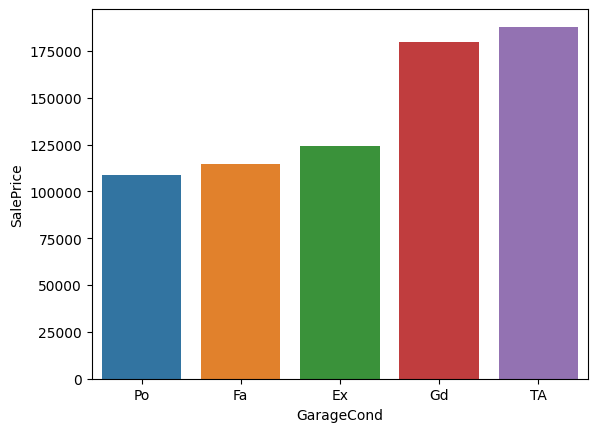

In [188]:
Corr_Plot(train, 'GarageCond')

In [189]:
Encoder(train, 'GarageCond')

In [190]:
fillna(train, 'GarageCond' , fill_value=0.0)
fillna(test, 'GarageCond' , fill_value=0.0)

## 63.PavedDrive

There is no nan values in both train and test. Dtype is object for now. It means Paved driveway

In [191]:
for dataset in full_data:
    explore_col(dataset, 'PavedDrive')

Value Counts
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64
----------------------------
Total NaN
0

***************************



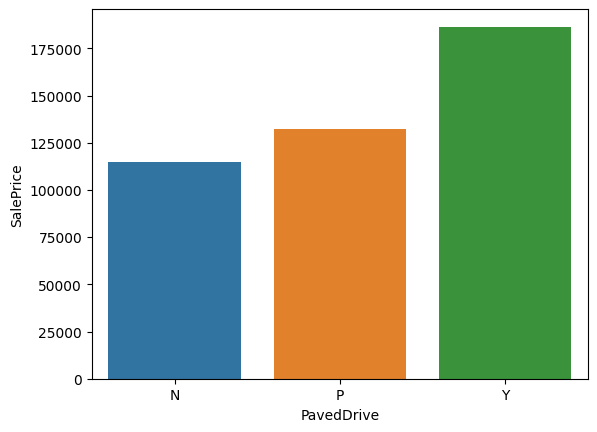

In [192]:
Corr_Plot(train, 'PavedDrive')

In [193]:
Encoder(train, 'PavedDrive')

## 64.WoodDeckSF

There is no nan values in both train and test. Dtype is int already. It means Wood deck area in square feet

In [194]:
for dataset in full_data:
    explore_col(dataset, 'WoodDeckSF')

Value Counts
0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0      762
100     38
192     32
168     28
144     28
      ... 
385      1
133      1
145      1
117      1
474      1
Name: WoodDeckSF, Length: 263, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

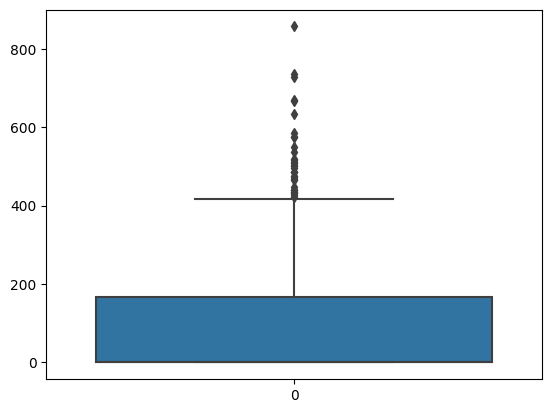

In [195]:
sns.boxplot(train['WoodDeckSF'])

## 65. OpenPorchSF

There is no nan values in both train and test. Dtype is int already. It means Open porch area in square feet

In [196]:
for dataset in full_data:
    explore_col(dataset, 'OpenPorchSF')

Value Counts
0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: OpenPorchSF, Length: 202, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0      642
48      29
32      27
40      25
36      23
      ... 
207      1
184      1
238      1
137      1
225      1
Name: OpenPorchSF, Length: 203, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

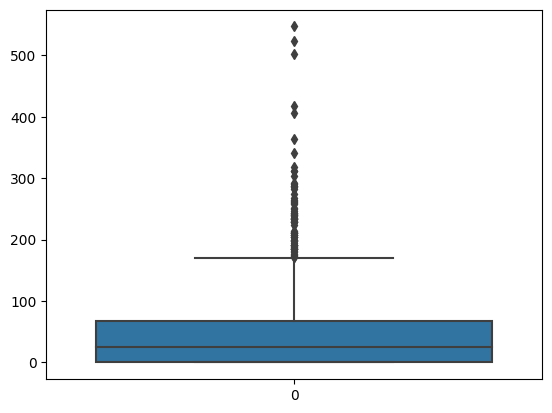

In [197]:
sns.boxplot(train['OpenPorchSF'])

## 66.EnclosedPorch

There is no nan values in both train and test. Dtype is int already. It means Enclosed porch area in square feet

In [198]:
for dataset in full_data:
    explore_col(dataset, 'EnclosedPorch')

Value Counts
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0      1208
96        7
168       7
112       7
144       6
       ... 
368       1
72        1
57        1
334       1
23        1
Name: EnclosedPorch, Length: 131, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

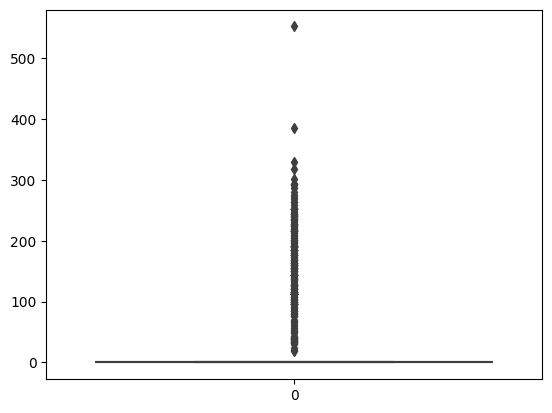

In [199]:
sns.boxplot(train['EnclosedPorch'])

## 67.3SsnPorch

One Value Column, almost everone is same. We dropped it before.

## 68.ScreenPorch

There is no nan values in both train and test. Dtype is int already. It means Screen porch area in square feet

In [200]:
for dataset in full_data:
    explore_col(dataset, 'ScreenPorch')

Value Counts
0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0      1319
144      10
168       7
216       6
192       5
       ... 
221       1
171       1
135       1
322       1
104       1
Name: ScreenPorch, Length: 75, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

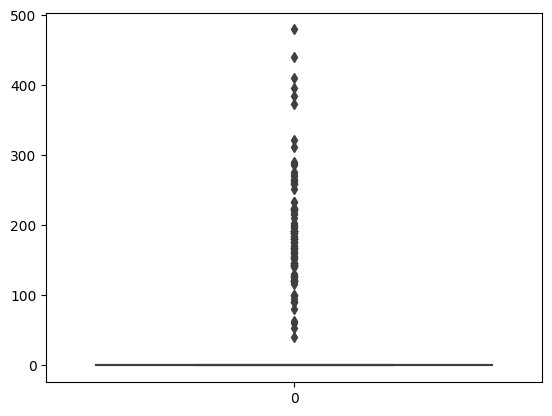

In [201]:
sns.boxplot(train['ScreenPorch'])

## 69.PoolArea

One Value Column, almost everone is same. We dropped it before.

## 70.PoolQC

Nan Column, almost every value is nan. We dropped it before.

## 71.Fence

Nan Column, almost every value is nan. We dropped it before.

## 72.MiscFeature

Nan Column, almost every value is nan. We dropped it before.

## 73.MiscVal

There is no nan values in both train and test. Dtype is int already. It means $Value of miscellaneous feature

In [202]:
for dataset in full_data:
    explore_col(dataset, 'MiscVal')

Value Counts
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
0        1408
400         7
500         5
450         5
600         4
650         3
2000        3
1500        3
3000        2
4500        2
700         2
455         1
6500        1
17000       1
460         1
1000        1
1512        1
2500        1
750         1
12500       1
900         1
1200        1
490         1
80          1
300         1
420         1
Name: MiscVal, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

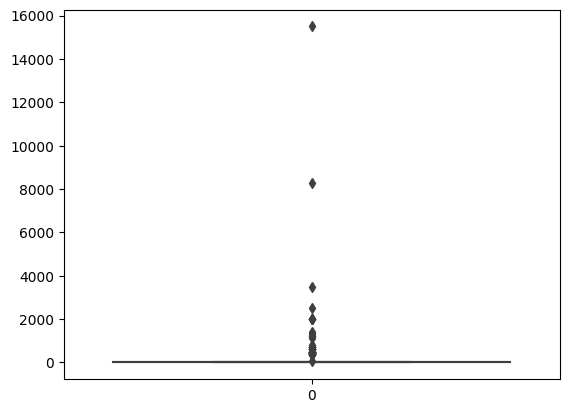

In [203]:
sns.boxplot(train['MiscVal']) # There can be outlier

## 74.MoSold

There is no nan values in both train and test. Dtype is int already. It means Month Sold

In [204]:
for dataset in full_data:
    explore_col(dataset, 'MoSold')

Value Counts
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
6     250
7     212
5     190
4     138
3     126
8     111
9      95
10     84
2      81
1      64
11     63
12     45
Name: MoSold, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

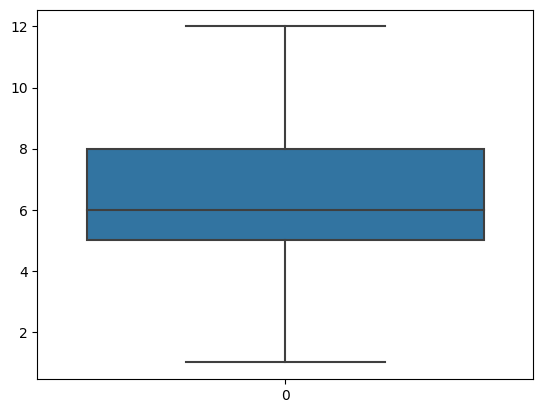

In [205]:
sns.boxplot(train['MoSold'])

## 75.YrSold

There is no nan values in both train and test. Dtype is int already. It means Year Sold

In [206]:
for dataset in full_data:
    explore_col(dataset, 'YrSold')

Value Counts
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64
----------------------------
Total NaN
0

***************************



<Axes: >

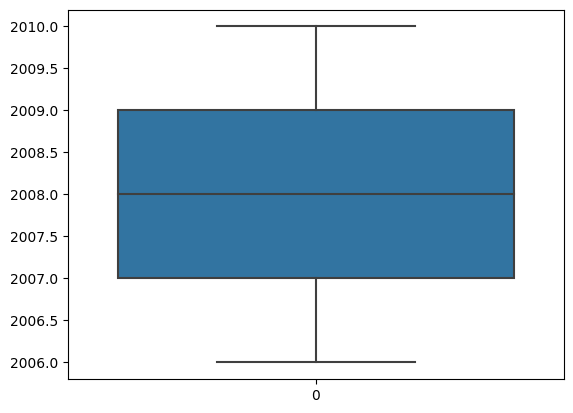

In [207]:
sns.boxplot(train['YrSold'])

## 76.SaleType

There is no nan values in train but 1 nan value in test. Dtype is object for now. It means Type of sale

In [208]:
for dataset in full_data:
    explore_col(dataset, 'SaleType')

Value Counts
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
NaN         1
Name: SaleType, dtype: int64
----------------------------
Total NaN
1

***************************



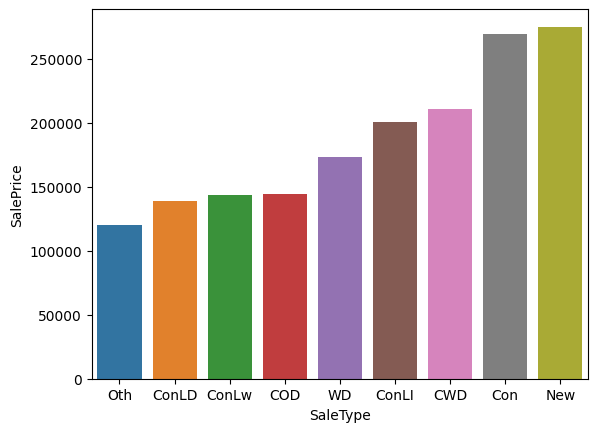

In [209]:
Corr_Plot(train, 'SaleType')

In [210]:
Encoder(train, 'SaleType')

In [211]:
fillna(test, 'SaleType' , 'median')

## 77.SaleCondition

There is no nan values in both train and test. Dtype is object for now. It means Condition of sale

In [212]:
for dataset in full_data:
    explore_col(dataset, 'SaleCondition')

Value Counts
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
----------------------------
Total NaN
0

***************************

Value Counts
Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64
----------------------------
Total NaN
0

***************************



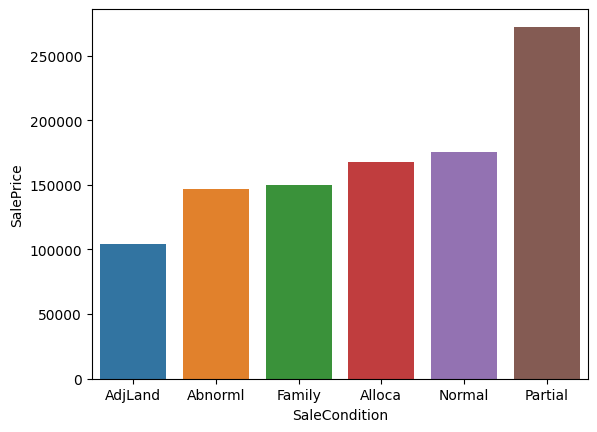

In [213]:
Corr_Plot(train, 'SaleCondition')

In [214]:
Encoder(train, 'SaleCondition')

In [215]:
# Done

In [216]:
train.isna().sum().sum()

0

In [217]:
test.isna().sum().sum()

0

In [218]:
train.drop('Id' , axis = 1, inplace=True)
test.drop('Id' , axis = 1, inplace=True)

In [219]:
train.corr()['SalePrice']

MSSubClass      -0.084284
MSZoning         0.324610
LotFrontage      0.334901
LotArea          0.263843
LotShape         0.265699
                   ...   
MoSold           0.046432
YrSold          -0.028923
SaleType         0.366821
SaleCondition    0.238111
SalePrice        1.000000
Name: SalePrice, Length: 69, dtype: float64

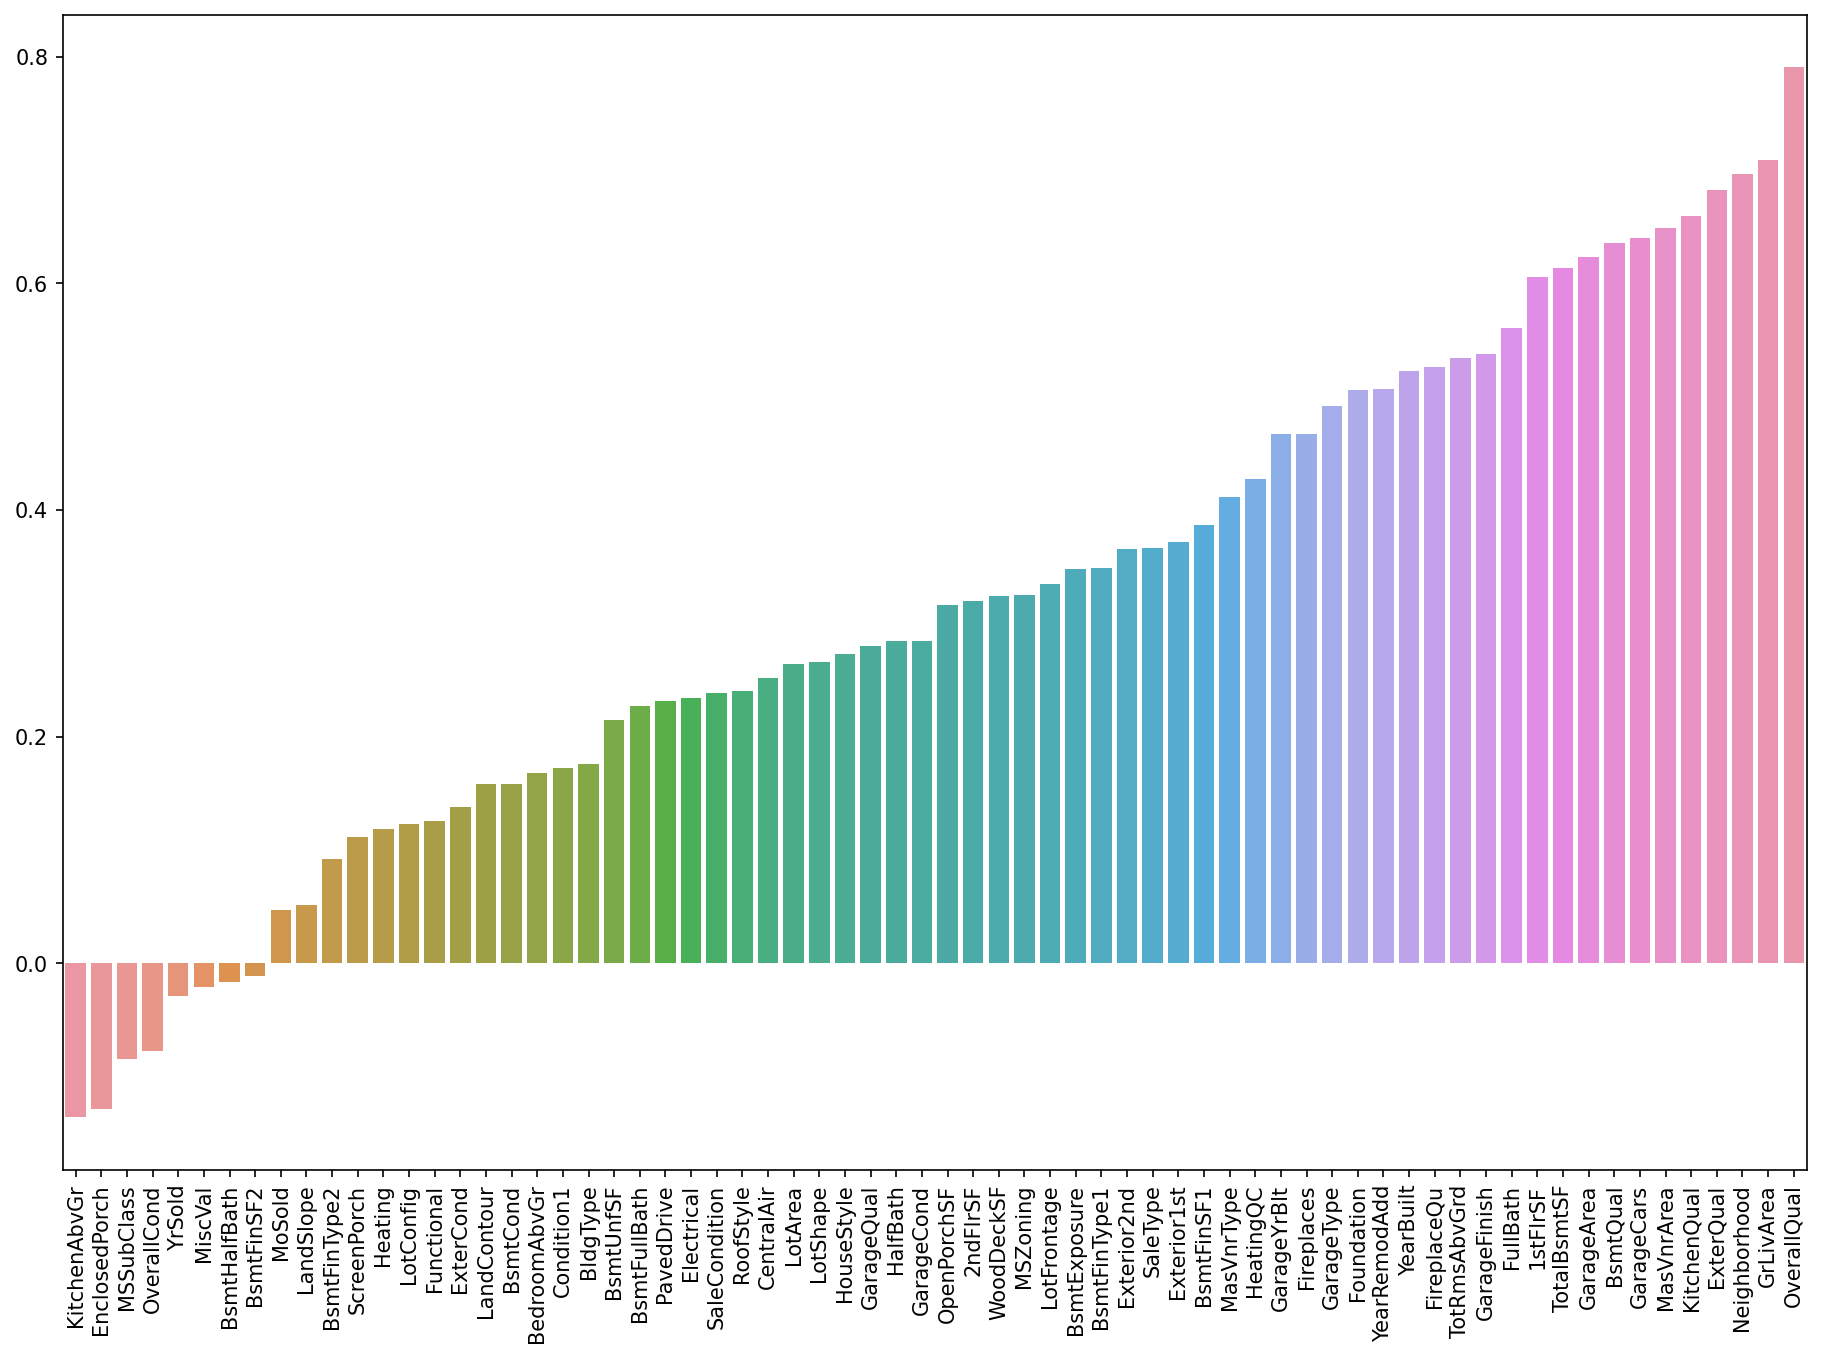

In [220]:
plt.figure(figsize=(15,10), dpi=150)

sns.barplot(x = train.corr()['SalePrice'].drop('SalePrice', axis = 0).sort_values().index , y = train.corr()['SalePrice'].drop('SalePrice' , axis=0).sort_values().values )

plt.xticks(rotation=90)

plt.show()

In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   LotConfig      1460 non-null   float64
 7   LandSlope      1460 non-null   float64
 8   Neighborhood   1460 non-null   float64
 9   Condition1     1460 non-null   float64
 10  BldgType       1460 non-null   float64
 11  HouseStyle     1460 non-null   float64
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   float64
 17  Exterior1st    1460 non-null   float64
 18  Exterior

# Train | Test Split

In [222]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state= 53)

# Scaling

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Eval Metrics

In [224]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

def adj_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (len(y_true) - 1)) / (len(y_true) - n_features - 1)
    return adj_r2

def eval_metric(model, X_test, y_test):
    global r2, adj_r2, mae, rmse
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test , y_pred) 
    mae = mean_absolute_error(y_test, y_pred)
    # mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    adj_r2 = adj_r2_score(y_test , y_pred , X_test.shape[1])
    print(f"""
          r2 : {r2}
          adj_r2 : {adj_r2}
          mae : {mae}
          rmse : {rmse}
          """)

# 1) LazyPredict Model Comparision

In [225]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [01:11<00:00,  1.71s/it]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.81       0.87  33038.10   
LGBMRegressor                                0.77       0.84  36665.50   
ExtraTreesRegressor                          0.77       0.84  36973.39   
HistGradientBoostingRegressor                0.77       0.84  36975.44   
BaggingRegressor                             0.75       0.83  38441.71   
RandomForestRegressor                        0.74       0.82  38946.35   
XGBRegressor                                 0.73       0.81  39845.73   
AdaBoostRegressor                            0.67       0.77  43978.31   
ExtraTreeRegressor                           0.66       0.77  44598.58   
LassoLarsCV                                  0.59       0.71  49337.87   
LassoCV                                      0.59       0.71  49339.09   
LassoLarsIC                           

In [226]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 2) Like Lazy

# 3) Search Best Ensemble Models

In [227]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , AdaBoostRegressor , BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor , cv , Pool
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from lightgbm import LGBMRegressor
import warnings

In [228]:
models_comparison = {}
scoring = 'neg_root_mean_squared_error'
cv = 5
random_state = 53
n_iter = 10

# Random Search Models

### 1.Part Models

In [229]:
models = []
with tf.device('/GPU:0'):
    parameters = {
    "max_depth": [7, 10 , 15 ,None],
    "max_features": ["auto","sqrt",None],
    "min_samples_split" : [2,3,5, 8],
    "splitter": ["best", "random"],
}
    tmp_model = DecisionTreeRegressor(random_state=random_state)
    dt_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=n_iter, scoring=scoring, cv=cv , random_state=random_state
    )
    models.append(dt_model_random)

    parameters = {
    'learning_rate': [0.01, 0.1, 0.4, 0.7, 1],
    'n_estimators': [100, 250, 450, 600, 800],
    'loss' : ['linear', 'square', 'exponential']
    }
    tmp_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth = 4), random_state=random_state)
    ada_model_random = RandomizedSearchCV(
        tmp_model, parameters,n_iter=n_iter, scoring=scoring, cv=cv, random_state=random_state
    )
    models.append(ada_model_random)
    
    parameters = {
    'n_estimators': [80 , 100, 250, 450, 600],
    'max_features': [1,2,3,5],
    }
    tmp_model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth = 4), random_state=random_state)
    bag_model_random = RandomizedSearchCV(
        tmp_model, parameters,n_iter= n_iter, scoring=scoring, cv=cv, random_state= random_state
    )
    models.append(bag_model_random)
    
    parameters = {
    "weights": ["uniform", "distance"],
    'p' : [2,3,5,10],
    'leaf_size' : [20,30,40,60,80,100],
    "algorithm": ["auto","ball_tree", "kd_tree", "brute"],
    }
    tmp_model = KNeighborsRegressor()
    knn_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=n_iter, scoring=scoring, cv=cv, random_state= random_state
    )
    models.append(knn_model_random)


parameters = {
    "max_depth": [8, 10 , 15 , None],
    'n_estimators': [300, 500, 750 , 1000 , 1200],
    "min_samples_split" : [2,3,5],
    "max_features": [3, 5, 8, 12 , 15 , None],
}
tmp_model = RandomForestRegressor(random_state=random_state)
rf_model_random = RandomizedSearchCV(
    tmp_model, parameters, n_iter=n_iter, scoring=scoring, cv=cv, random_state= random_state
)
models.append(rf_model_random)


with tf.device('/GPU:0'):
    parameters = {
        "loss": ["squared_error"],
        'n_estimators': [500, 1000 , 1250 , 1500],
        "max_features": [3, 5, 8, None],
        "max_depth": [4, 6, 7, 10],
        "min_samples_split" : [2,3,5],
        "learning_rate": np.arange(0.01, 0.6, 0.1),
    }
    tmp_model = GradientBoostingRegressor(random_state=random_state)
    gb_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=n_iter ,scoring=scoring, cv=cv, random_state=random_state
    )
    models.append(gb_model_random)

parameters = {
'n_estimators': [100, 150, 300, 500, 750],
'max_depth': [2, 3, 5, None],
"learning_rate": np.arange(0.01, 1.1, 0.1),
}
tmp_model = XGBRegressor(tree_method = 'gpu_hist')
xgb_model_random = RandomizedSearchCV(
    tmp_model, parameters, n_iter=n_iter, scoring=scoring, cv=cv, random_state= random_state
)
models.append(xgb_model_random)

parameters = {
'learning_rate': [0.01, 0.05, 0.1, 0.4, 0.7, 1],
'n_estimators': [100, 250, 450, 600],
'max_depth': [2, 3, 5, 8, None],
}
tmp_model = LGBMRegressor(device = 'gpu')
lgb_model_random = RandomizedSearchCV(
    tmp_model, parameters, n_iter=n_iter, scoring=scoring, cv=cv, random_state=random_state
)
models.append(lgb_model_random)

parameters = {
'learning_rate': [0.01, 0.05, 0.1, 0.4, 0.7, 1],
'iterations': [500, 1000, 2000],
'max_depth': [2, 3, 5, 8, None],
}
tmp_model = CatBoostRegressor(devices='GPU:0', random_seed= random_state)
cat_model_random = RandomizedSearchCV(
    tmp_model, parameters, n_iter= n_iter, scoring=scoring, cv=cv, random_state=random_state
)
models.append(cat_model_random)

def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(100, input_dim=X.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, input_dim=X.shape[1], activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model
parameters = {'optimizer': ['adam', 'sgd'], 'activation': ['relu', 'sigmoid', 'tanh'],
            'batch_size' : [16, 32, 64], 'epochs' : [10, 50, 100], 
            'dropout_rate' : [0.0, 0.2, 0.4]}
model = KerasRegressor(build_fn=create_model, verbose=0)
nn_model_random = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_iter=n_iter, cv=cv, scoring=scoring , random_state=random_state)
models.append(nn_model_random)

# GridSearch Models

### 1.Part Models

In [230]:
# models = []
# with tf.device('/GPU:0'):
#     parameters = {
#     "max_depth": [7, 10 , 15 ,None],
#     "max_features": ["auto","sqrt",None],
#     "min_samples_split" : [2,3,5, 8],
#     "splitter": ["best", "random"],
# }
#     tmp_model = DecisionTreeRegressor(random_state=random_state)
#     dt_model_random = GridSearchCV(
#         tmp_model, parameters, n_jobs=-1, scoring=scoring, cv=cv
#     )
#     models.append(dt_model_random)

#     parameters = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.4, 0.7, 1],
#     'n_estimators': [100, 250, 450, 600, 800],
#     'loss' : ['linear', 'square', 'exponential']
#     }
#     tmp_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth = 4), random_state=random_state)
#     ada_model_random = GridSearchCV(
#         tmp_model, parameters, scoring=scoring, cv=cv
#     )
#     models.append(ada_model_random)
    
#     parameters = {
#     'n_estimators': [10, 50 , 100, 250, 450],
#     'max_features': [1,2,3,5],
#     }
#     tmp_model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth = 4), random_state=random_state)
#     bag_model_random = GridSearchCV(
#         tmp_model, parameters, scoring=scoring, cv=cv
#     )
#     models.append(bag_model_random)
    
#     parameters = {
#     "weights": ["uniform", "distance"],
#     'p' : [2,3,5,10],
#     'leaf_size' : [20,30,40,60,80,100],
#     "algorithm": ["auto","ball_tree", "kd_tree", "brute"],
#     }
#     tmp_model = KNeighborsRegressor()
#     knn_model_random = GridSearchCV(
#         tmp_model, parameters, n_jobs=-1, scoring=scoring, cv=cv
#     )
#     models.append(knn_model_random)


# parameters = {
#     "max_depth": [8, 10 , 15 , None],
#     'n_estimators': [300, 500, 750 , 1000 , 1200],
#     "min_samples_split" : [2,3,5],
#     "max_features": [3, 5, 8, 12 , 15 , None],
# }
# tmp_model = RandomForestRegressor(random_state=random_state)
# rf_model_random = GridSearchCV(
#     tmp_model, parameters, n_jobs=-1, scoring=scoring, cv=cv
# )
# models.append(rf_model_random)


# with tf.device('/GPU:0'):
#     parameters = {
#         "loss": ["squared_error"],
#         'n_estimators': [500, 1000 , 1250 , 1500],
#         "max_features": [3, 5, 8, None],
#         "max_depth": [4, 6, 7, 10],
#         "min_samples_split" : [2,3,5],
#         "learning_rate": np.arange(0.01, 0.6, 0.1),
#     }
#     tmp_model = GradientBoostingRegressor(random_state=random_state)
#     gb_model_random = GridSearchCV(
#         tmp_model, parameters, scoring=scoring, cv=cv
#     )
#     models.append(gb_model_random)

# parameters = {
# 'n_estimators': [100, 150, 300, 500, 750],
# 'max_depth': [2, 3, 5, None],
# "learning_rate": np.arange(0.01, 1.1, 0.1),
# }
# tmp_model = XGBRegressor(tree_method = 'gpu_hist')
# xgb_model_random = GridSearchCV(
#     tmp_model, parameters, scoring=scoring, cv=cv
# )
# models.append(xgb_model_random)

# parameters = {
# 'learning_rate': [0.01, 0.05, 0.1, 0.4, 0.7, 1],
# 'n_estimators': [100, 250, 450, 600],
# 'max_depth': [2, 3, 5, 8, None],
# }
# tmp_model = LGBMRegressor(device = 'gpu')
# lgb_model_random = GridSearchCV(
#     tmp_model, parameters, scoring=scoring, cv=cv
# )
# models.append(lgb_model_random)

# parameters = {
# 'learning_rate': [0.01, 0.05, 0.1, 0.4, 0.7, 1],
# 'iterations': [500, 1000, 2000],
# 'depth': [2, 3, 5, 8, None],
# }
# tmp_model = CatBoostRegressor(devices='GPU:0', random_seed= random_state)
# cat_model_random = GridSearchCV(
#     tmp_model, parameters, scoring=scoring, cv=cv
# )
# models.append(cat_model_random)

# def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
#     model = Sequential()
#     model.add(Dense(30, input_dim=X.shape[1], activation=activation))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation='linear'))
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model
# parameters = {'optimizer': ['adam', 'sgd'], 'activation': ['relu', 'sigmoid', 'tanh'],
#             'batch_size' : [16, 32, 64], 'epochs' : [10, 50, 100], 
#             'dropout_rate' : [0.0, 0.2, 0.4]}
# model = KerasRegressor(build_fn=create_model, verbose=0)
# nn_model_random = GridSearchCV(estimator=model, param_grid=parameters, cv=cv, scoring=scoring)
# models.append(nn_model_random)

### 1.Part Models Fitting

In [231]:
warnings.filterwarnings("ignore")

i = 0
model_names = [
    "DecisionTreeRegressor",
    "AdaBoostRegressor",
    "BaggingRegressor",
    "KNeighborsRegressor",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "XGBRegressor", 
    "LGBMRegressor",
    "CatBoostRegressor",
    "KerasRegressor"
]

for model in models:
    print(f"Model: {model_names[i]}\n")
    model.fit(X_train, y_train)
    eval_metric(model, X_test, y_test)
    print("-" * 30, "\n")
    models_comparison[f"{model_names[i]}"] = [
        r2,
        adj_r2,
        mae,
        rmse,
    ]
    i += 1

Model: DecisionTreeRegressor


          r2 : 0.7833371881662222
          adj_r2 : 0.685116713468243
          mae : 27398.305821688256
          rmse : 43004.168505399204
          
------------------------------ 

Model: AdaBoostRegressor


          r2 : 0.8072048936783343
          adj_r2 : 0.7198044454791791
          mae : 23814.567803700906
          rmse : 40566.390824203525
          
------------------------------ 

Model: BaggingRegressor


          r2 : 0.6052651976750127
          adj_r2 : 0.4263187539543518
          mae : 31756.644286461877
          rmse : 58045.836804704275
          
------------------------------ 

Model: KNeighborsRegressor


          r2 : 0.7218732503753367
          adj_r2 : 0.5957891238788227
          mae : 24537.805340976833
          rmse : 48723.64245109719
          
------------------------------ 

Model: RandomForestRegressor


          r2 : 0.8269131911561064
          adj_r2 : 0.7484471711468746
          mae : 19357.324050228308
   

### 2.Part Models Fitting

# All Models Comparision

In [232]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "R2",
    "Adjusted_R2",
    "Mean_Absolute_Error",
    "Root_Mean_Squared_Error",
]
models_com_df = models_com_df.sort_values(by="Root_Mean_Squared_Error", ascending=True)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

### 1.Part Model's Parameters

In [233]:
print(f"DecisionTreeRegressor parameters {dt_model_random.best_params_}")
print(f"AdaBoostRegressor parameters {ada_model_random.best_params_}")
print(f"BaggingRegressor parameters {bag_model_random.best_params_}")
print(f"KNeighborsRegressor parameters {knn_model_random.best_params_}")
print(f"RandomForestRegressor parameters {rf_model_random.best_params_}")
print(f"GradientBoostingRegressor parameters {gb_model_random.best_params_}")
print(f"XGBRegressor parameters {xgb_model_random.best_params_}")
print(f"LGBMRegressor parameters {lgb_model_random.best_params_}")
print(f"CatBoostRegressor parameters {cat_model_random.best_params_}")
print(f"KerasRegressor parameters {nn_model_random.best_params_}")

DecisionTreeRegressor parameters {'splitter': 'random', 'min_samples_split': 3, 'max_features': 'auto', 'max_depth': 7}
AdaBoostRegressor parameters {'n_estimators': 800, 'loss': 'linear', 'learning_rate': 0.7}
BaggingRegressor parameters {'n_estimators': 250, 'max_features': 5}
KNeighborsRegressor parameters {'weights': 'distance', 'p': 2, 'leaf_size': 80, 'algorithm': 'kd_tree'}
RandomForestRegressor parameters {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 15, 'max_depth': None}
GradientBoostingRegressor parameters {'n_estimators': 1250, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 7, 'loss': 'squared_error', 'learning_rate': 0.01}
XGBRegressor parameters {'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.6100000000000001}
LGBMRegressor parameters {'n_estimators': 600, 'max_depth': None, 'learning_rate': 0.01}
CatBoostRegressor parameters {'max_depth': 5, 'learning_rate': 0.01, 'iterations': 2000}
KerasRegressor parameters {'optimizer': 'sgd', 'epoch

### 2.Part Model's Parameters

# Create Ensemble Models

In [234]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [1]:
# # 1.Part Birinci düzey modellerin Manuel oluşturulması
# dt = DecisionTreeRegressor(max_depth= 10 , max_features= 'auto' , min_samples_split= 8 , splitter= 'random' )
# ada = AdaBoostRegressor(learning_rate= 1 , loss= 'linear' ,  n_estimators= 800)
# bag = BaggingRegressor(n_estimators= 450 , max_features=5)
# knn = KNeighborsRegressor(algorithm= 'auto' , leaf_size= 20 , p = 2 , weights= 'distance'  )
# rf = RandomForestRegressor(n_estimators= 1000 , max_depth=15 , max_features=15 , min_samples_split=2 , random_state= 53)
# gb = GradientBoostingRegressor(n_estimators= 1500 , min_samples_split=2 , max_features=8 , max_depth= 4 , learning_rate= 0.01 , loss='squared_error')
# xgb = XGBRegressor(n_estimators= 750 , max_depth = 2 , learning_rate = 0.11 , random_state = 53 , tree_method='gpu_hist')
# lgb = LGBMRegressor(n_estimators= 450 , max_depth=2 , learning_rate= 0.05 , device='gpu') 
# cat = CatBoostRegressor(random_seed=53, devices='GPU:0' , iterations=2000 , learning_rate=0.3 , depth = 6)
# nn = 

# 1.Part Birinci düzey modellerin Otomatik oluşturulması
dt = dt_model_random.best_estimator_
ada = ada_model_random.best_estimator_
bag = bag_model_random.best_estimator_
knn = knn_model_random.best_estimator_
rf = rf_model_random.best_estimator_
gb = gb_model_random.best_estimator_
xgb = xgb_model_random.best_estimator_
lgb = lgb_model_random.best_estimator_
cat = cat_model_random.best_estimator_
nn = nn_model_random.best_estimator_

NameError: name 'dt_model_random' is not defined

In [ ]:
# Birinci düzey modellerin eğitimi ve tahminleri
dt.fit(X_train, y_train)
ada.fit(X_train, y_train)
bag.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
cat.fit(X_train, y_train)
nn.fit(X_train, y_train)

dt_preds = rf.predict(X_test)
ada_preds = rf.predict(X_test)
bag_preds = rf.predict(X_test)
knn_preds = rf.predict(X_test)
rf_preds = rf.predict(X_test)
gb_preds = gb.predict(X_test)
xgb_preds = xgb.predict(X_test)
lgb_preds = lgb.predict(X_test)
cat_preds = cat.predict(X_test)
nn_preds = nn.predict(X_test)


# Birinci düzey tahminlerinin meta-veri seti olarak birleştirilmesi
meta_data = pd.DataFrame({'dt_preds' : dt_preds , 'ada_preds': ada_preds , 'bag_preds' : bag_preds ,
                          'knn_preds' : knn_preds , 'rf_preds': rf_preds, 'gb_preds': gb_preds ,
                          'xgb_preds' : xgb_preds, 'lgb_preds': lgb_preds, 'cat_preds' : cat_preds, 'nn_preds' : nn_preds
                          })

# Meta-modelin oluşturulması
meta_model = MLPRegressor(hidden_layer_sizes=(200,100), activation='relu', solver='adam', random_state= random_state)

# Meta-modelin eğitimi ve tahmini
meta_model.fit(meta_data, y_test)

stacked_preds = meta_model.predict(meta_data)

# Skorlar

In [ ]:
dt_rmse = mean_squared_error(y_test , dt_preds)**0.5
print(f"DT RMSE : {dt_rmse}")
ada_rmse = mean_squared_error(y_test , ada_preds)**0.5
print(f"Ada RMSE : {ada_rmse}")
bag_rmse = mean_squared_error(y_test , bag_preds)**0.5
print(f"Bag RMSE : {bag_rmse}")
knn_rmse = mean_squared_error(y_test , knn_preds)**0.5
print(f"KNN RMSE : {knn_rmse}")
rf_rmse = mean_squared_error(y_test , rf_preds)**0.5
print(f"RF RMSE : {rf_rmse}")
gb_rmse = mean_squared_error(y_test , gb_preds)**0.5
print(f"GB RMSE : {gb_rmse}")
xgb_rmse = mean_squared_error(y_test , xgb_preds)**0.5
print(f"XGB RMSE : {xgb_rmse}")
lgb_rmse = mean_squared_error(y_test , lgb_preds)**0.5
print(f"LGB RMSE : {lgb_rmse}")
cat_rmse = mean_squared_error(y_test , cat_preds)**0.5
print(f"Cat RMSE : {cat_rmse}")
nn_rmse = mean_squared_error(y_test , nn_preds)**0.5
print(f"NN RMSE : {nn_rmse}")

stacked_rmse = mean_squared_error(y_test, stacked_preds)**0.5
print(f"Stacked Models RMSE : {stacked_rmse}")

# Prediction

## Final Models

#### Final Models Building

In [ ]:
# 1.Part Birinci düzey FINAL modellerin Manuel oluşturulması
# dt = DecisionTreeRegressor(max_depth= 10 , max_features= 'auto' , min_samples_split= 8 , splitter= 'random' )
# ada = AdaBoostRegressor(learning_rate= 1 , loss= 'linear' ,  n_estimators= 800)
# bag = BaggingRegressor(n_estimators= 450 , max_features=5)
# knn = KNeighborsRegressor(algorithm= 'auto' , leaf_size= 20 , p = 2 , weights= 'distance'  )
# rf = RandomForestRegressor(n_estimators= 1000 , max_depth=15 , max_features=15 , min_samples_split=2 , random_state= 53)
# gb = GradientBoostingRegressor(n_estimators= 1500 , min_samples_split=2 , max_features=8 , max_depth= 4 , learning_rate= 0.01 , loss='squared_error')
# xgb = XGBRegressor(n_estimators= 750 , max_depth = 2 , learning_rate = 0.11 , random_state = 53 , tree_method='gpu_hist')
# lgb = LGBMRegressor(n_estimators= 450 , max_depth=2 , learning_rate= 0.05 , device='gpu') 
# cat = CatBoostRegressor(random_seed=53, devices='GPU:0' , iterations=2000 , learning_rate=0.3 , depth = 6)
# nn = 


# 1.Part Birinci düzey FINAL modellerinin Otomatik Oluşturulması
dt_final = dt_model_random.best_estimator_
ada_final = ada_model_random.best_estimator_
bag_final = bag_model_random.best_estimator_
knn_final = knn_model_random.best_estimator_
rf_final = rf_model_random.best_estimator_
gb_final = gb_model_random.best_estimator_
xgb_final = xgb_model_random.best_estimator_
lgb_final = lgb_model_random.best_estimator_
cat_final = cat_model_random.best_estimator_
nn_final = nn_model_random.best_estimator_

#### Final Models Fitting

In [ ]:
# 1.Part Birinci düzey FINAL modellerin eğitimi ve tahminleri
dt_final.fit(X, y)
ada_final.fit(X, y)
bag_final.fit(X, y)
knn_final.fit(X, y)
rf_final.fit(X, y)
gb_final.fit(X, y)
xgb_final.fit(X, y)
lgb_final.fit(X, y)
cat_final.fit(X, y)
nn_final.fit(X, y)

#### Stacked_Final Preds same Weights

In [ ]:
dt_final_preds = dt_final.predict(test)
ada_final_preds = ada_final.predict(test)
bag_final_preds = bag_final.predict(test)
knn_final_preds = knn_final.predict(test)
rf_final_preds = rf_final.predict(test)
gb_final_preds = gb_final.predict(test)
xgb_final_preds = xgb_final.predict(test)
lgb_final_preds = lgb_final.predict(test)
cat_final_preds = cat_final.predict(test)
nn_final_preds = nn_final.predict(test)

# Eşit ağırlıklarla Stacked Ensemble modeli ile tahmin yapma

stacked_final_preds = np.round((dt_final_preds+ada_final_preds+bag_final_preds+knn_final_preds+rf_final_preds+gb_final_preds+xgb_final_preds+lgb_final_preds+cat_final_preds+nn_final_preds) / 10).astype(int)

#### Stacked Final Preds different Weights

1.Way Manually Weighted

In [ ]:
dt_final_preds = pd.DataFrame({'dt': dt_final.predict(test)})
ada_final_preds = pd.DataFrame({'ada': ada_final.predict(test)})
bag_final_preds = pd.DataFrame({'bag': bag_final.predict(test)})
knn_final_preds = pd.DataFrame({'knn': knn_final.predict(test)})
rf_final_preds = pd.DataFrame({'rf': rf_final.predict(test)})
gb_final_preds = pd.DataFrame({'gb': gb_final.predict(test)})
xgb_final_preds = pd.DataFrame({'xgb': xgb_final.predict(test)})
lgb_final_preds = pd.DataFrame({'lgb': lgb_final.predict(test)})
cat_final_preds = pd.DataFrame({'cat': cat_final.predict(test)})
nn_final_preds = pd.DataFrame({'nn': nn_final.predict(test)})


# Ağırlık faktörlerini belirleyin 
weights = {'dt': 0.1, 'ada': 0.2, 'bag': 0.1, 'knn': 0.1, 'rf': 0.15, 
           'gb': 0.2, 'xgb': 0.3, 'lgb': 0.2, 'cat': 0.2, 'nn': 0.01}


# Tahminleri birleştirin ve ağırlıklandırın
ensemble_preds = pd.concat([dt_final_preds, ada_final_preds, bag_final_preds,
                            knn_final_preds, rf_final_preds, gb_final_preds,
                            xgb_final_preds, lgb_final_preds, cat_final_preds,
                            nn_final_preds], axis=1)


ensemble_preds_weighted = (ensemble_preds.iloc[:,0]*weights['dt'] + 
                           ensemble_preds.iloc[:,1]*weights['ada'] + 
                           ensemble_preds.iloc[:,2]*weights['bag'] + 
                           ensemble_preds.iloc[:,3]*weights['knn'] + 
                           ensemble_preds.iloc[:,4]*weights['rf'] + 
                           ensemble_preds.iloc[:,5]*weights['gb'] + 
                           ensemble_preds.iloc[:,6]*weights['xgb'] + 
                           ensemble_preds.iloc[:,7]*weights['lgb'] + 
                           ensemble_preds.iloc[:,8]*weights['cat'] + 
                           ensemble_preds.iloc[:,9]*weights['nn']).values

ensemble_preds_weighted = np.array(pd.DataFrame({'predictions': ensemble_preds_weighted})['predictions'])

In [ ]:
ensemble_preds_weighted

2.Way Automatic Weighted

In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# # Modellerin tahminlerini yükle
# dt_final_preds = pd.DataFrame({'dt': dt_final.predict(test)})
# ada_final_preds = pd.DataFrame({'ada': ada_final.predict(test)})
# bag_final_preds = pd.DataFrame({'bag': bag_final.predict(test)})
# knn_final_preds = pd.DataFrame({'knn': knn_final.predict(test)})
# rf_final_preds = pd.DataFrame({'rf': rf_final.predict(test)})
# gb_final_preds = pd.DataFrame({'gb': gb_final.predict(test)})
# xgb_final_preds = pd.DataFrame({'xgb': xgb_final.predict(test)})
# lgb_final_preds = pd.DataFrame({'lgb': lgb_final.predict(test)})
# cat_final_preds = pd.DataFrame({'cat': cat_final.predict(test)})
# nn_final_preds = pd.DataFrame({'nn': nn_final.predict(test)})

# # Modellerin tahminlerini birleştir
# ensemble_preds = pd.concat([dt_final_preds, ada_final_preds, bag_final_preds,
#                             knn_final_preds, rf_final_preds, gb_final_preds,
#                             xgb_final_preds, lgb_final_preds, cat_final_preds,
#                             nn_final_preds], axis=1)

# # Ağırlık faktörlerini belirleyin
# weights = np.array([0.1, 0.2, 0.05, 0.1, 0.15, 0.05, 0.1, 0.1, 0.05, 0.1])

# # NN modeli oluşturun
# model = keras.Sequential([
#     keras.layers.Dense(64, activation='relu', input_shape=(ensemble_preds.shape[1],)),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(1, activation='linear')
# ])

# # Modeli derleyin
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Tahminleri NN modeline besleyin ve ağırlık faktörlerine göre birleştirin
# ensemble_preds_weighted = (ensemble_preds.values * weights).sum(axis=1)
# ensemble_preds_nn = model.predict(ensemble_preds.values).flatten()
# ensemble_preds_weighted_nn = (ensemble_preds_nn * weights).sum()

# # Ağırlıklı tahminleri yazdırın
# print('Weighted Ensemble Prediction:', ensemble_preds_weighted)
# print('Weighted Ensemble Prediction using NN:', ensemble_preds_weighted_nn)

In [ ]:
# from sklearn.neural_network import MLPClassifier

# dt_final_preds = pd.DataFrame({'dt': dt_final.predict(X)})
# ada_final_preds = pd.DataFrame({'ada': ada_final.predict(X)})
# bag_final_preds = pd.DataFrame({'bag': bag_final.predict(X)})
# knn_final_preds = pd.DataFrame({'knn': knn_final.predict(X)})
# rf_final_preds = pd.DataFrame({'rf': rf_final.predict(X)})
# gb_final_preds = pd.DataFrame({'gb': gb_final.predict(X)})
# xgb_final_preds = pd.DataFrame({'xgb': xgb_final.predict(X)})
# lgb_final_preds = pd.DataFrame({'lgb': lgb_final.predict(X)})
# cat_final_preds = pd.DataFrame({'cat': cat_final.predict(X)})
# nn_final_preds = pd.DataFrame({'nn': nn_final.predict(X)})


# # Ağırlık faktörlerini belirleyin (rastgele örnek)
# weights = {'dt': 0.1, 'ada': 0.2, 'bag': 0.1, 'knn': 0.1, 'rf': 0.15, 
#            'gb': 0.2, 'xgb': 0.3, 'lgb': 0.2, 'cat': 0.2, 'nn': 0.01}


# # Tahminleri birleştirin ve ağırlıklandırın
# ensemble_preds = pd.concat([dt_final_preds, ada_final_preds, bag_final_preds,
#                             knn_final_preds, rf_final_preds, gb_final_preds,
#                             xgb_final_preds, lgb_final_preds, cat_final_preds,
#                             nn_final_preds], axis=1)


# ensemble_preds_weighted = (ensemble_preds.iloc[:,0]*weights['dt'] + 
#                            ensemble_preds.iloc[:,1]*weights['ada'] + 
#                            ensemble_preds.iloc[:,2]*weights['bag'] + 
#                            ensemble_preds.iloc[:,3]*weights['knn'] + 
#                            ensemble_preds.iloc[:,4]*weights['rf'] + 
#                            ensemble_preds.iloc[:,5]*weights['gb'] + 
#                            ensemble_preds.iloc[:,6]*weights['xgb'] + 
#                            ensemble_preds.iloc[:,7]*weights['lgb'] + 
#                            ensemble_preds.iloc[:,8]*weights['cat'] + 
#                            ensemble_preds.iloc[:,9]*weights['nn']).values

# ensemble_preds_weighted = np.array(pd.DataFrame({'predictions': ensemble_preds_weighted})['predictions'])

# # Ensemble tahminlerini ve hedef çıktıları ayarlayın
# X_ensemble_Fulltrain = ensemble_preds_weighted.reshape(-1,1)
# y_ensemble_Fulltrain = y

# # MLP'yi kurun ve eğitin
# mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.1,
#                     solver='adam', verbose=10, tol=1e-4, random_state=random_state,
#                     learning_rate_init=.1)
# mlp.fit(X_ensemble_Fulltrain, y_ensemble_Fulltrain)

# # Test verilerinde tahminler yapın
# X_test = ((dt_final_preds*weights['dt']).values.reshape(-1) + (ada_final_preds*weights['ada']).values.reshape(-1) +
#           (bag_final_preds*weights['bag']).values.reshape(-1) + (knn_final_preds*weights['knn']).values.reshape(-1) +
#           (rf_final_preds*weights['rf']).values.reshape(-1) + (gb_final_preds*weights['gb']).values.reshape(-1) +
#           (xgb_final_preds*weights['xgb']).values.reshape(-1) + (lgb_final_preds*weights['lgb']).values.reshape(-1) +
#           (cat_final_preds*weights['cat']).values.reshape(-1) + (nn_final_preds*weights['nn']).values.reshape(-1)).reshape(-1,1)

# ensemble_preds_weighted_tuned = mlp.predict(X_test)

In [ ]:
# Done.